In [99]:
import os
import pickle
import numpy as np
import cv2 as cv
from PIL import Image, ImageEnhance
import matplotlib .pyplot as plt
from itertools import permutations, combinations
import scipy.stats as stats
import pandas as pd
from pylatex import Document, Section, Subsection, Tabular, MultiColumn, MultiRow
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

def rotate(x, degree):
    # Rotate the image by degrees counter clockwise
    return x.rotate(degree)

def enh_bri(x, brightness):
    bri = ImageEnhance.Brightness(x)
    return bri.enhance(brightness)

def enh_con(x, contrast):
    con = ImageEnhance.Contrast(x)
    return con.enhance(contrast)

def enh_sha(x, sharpness):
    sha = ImageEnhance.Sharpness(x)
    return sha.enhance(sharpness)

def gaussian(x, kernel_size):
    x = np.array(x)
    x = cv.GaussianBlur(x, kernel_size, sigmaX=0)
    return Image.fromarray(x)

def shear(x, shear_factor):
    # 定义错切变换矩阵
    shear_matrix = [1, shear_factor, 0, 0, 1, 0]

    # 创建Affine对象并应用错切变换
    sheared_img = x.transform(
        x.size, Image.Transform.AFFINE, shear_matrix
    )
    return sheared_img

def translate(x, shift):
    shift_x, shift_y = shift[0], shift[1]
    # 进行平移操作
    translated_img = x.transform(
        x.size, Image.Transform.AFFINE, (1, 0, shift_x, 0, 1, shift_y)
    )
    return translated_img

strength_max = 5
mrs = [rotate, enh_bri, enh_sha, enh_con, gaussian, shear, translate]
mrs_name =[mr.__name__ for mr in mrs]
paras = [3, 0.8, 0.8, 0.8, (3, 3), 0.1, (1,1)]

datasets = ['MNIST', 'Caltech256', 'VOC', 'COCO']
test_cases_num = {'MNIST': 10000, 'Caltech256': 3061, 'VOC':4952, 'COCO':40775}
# models = {'MNIST': ['AlexNet', 'ResNet18'],
#           'Caltech256': ['DenseNet121', 'Inception_v3'],
#           'VOC': ['MSRN', 'MCAR'],
#           'COCO': ['MLD', 'ASL']}
models = {'MNIST': ['AlexNet'],
          'Caltech256': ['DenseNet121'],
          'VOC': ['MSRN'],
          'COCO': ['MLD']}
#model_names = ['MNIST_AlexNet_9938', 'MNIST_ResNet18_9906','Caltech256_DenseNet121_6838', 'Caltech256_Inception_v3_6720', 'VOC_MSRN', 'VOC_MCAR', 'COCO_MLD', 'COCO_ASL']
model_names = ['MNIST_AlexNet_9938', 'Caltech256_DenseNet121_6838', 'VOC_MSRN', 'VOC_MCAR', 'COCO_MLD']
model_names_figure_table = ['MNIST_AlexNet', 'MNIST_ResNet','Caltech256_DenseNet', 'Caltech256_Inception','VOC_MSRN', 'VOC_MCAR', 'COCO_MLD', 'COCO_ASL']

# RQ1 Validity

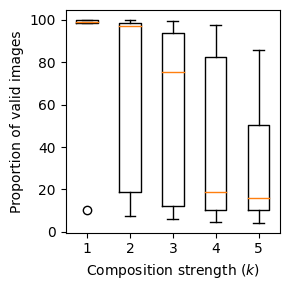

[99.92, 99.76, 99.94, 10.100000000000001, 98.68, 98.56, 99.28]
MNIST: k=1, median=99.28%
[99.74, 99.94, 9.78, 98.18, 98.32, 99.22, 99.72999999999999, 99.59, 18.56, 94.77, 97.56, 98.42, 99.9, 99.67, 9.73, 96.89999999999999, 97.94, 98.94, 10.66, 18.66, 9.81, 7.739999999999999, 11.61, 13.99, 98.11999999999999, 95.09, 97.15, 7.670000000000001, 88.03, 91.25999999999999, 98.35000000000001, 97.50999999999999, 97.98, 9.610000000000001, 88.05, 75.27000000000001, 99.15, 98.36, 99.0, 9.86, 90.99000000000001, 76.99000000000001]
MNIST: k=2, median=97.03%
[99.48, 18.11, 94.07, 97.23, 98.2, 99.52, 9.71, 95.98, 97.77, 98.85000000000001, 18.17, 9.65, 7.68, 11.43, 13.71, 94.31, 96.54, 7.6499999999999995, 87.38, 90.52, 97.28, 97.92, 9.379999999999999, 87.03, 74.61, 98.14, 98.76, 9.54, 89.98, 76.6, 99.49, 17.97, 93.97, 97.24000000000001, 98.16, 99.53999999999999, 18.17, 92.43, 96.6, 97.66, 19.39, 17.71, 14.62, 20.74, 23.27, 93.78, 92.84, 14.719999999999999, 85.45, 88.33, 97.39999999999999, 96.509999999999

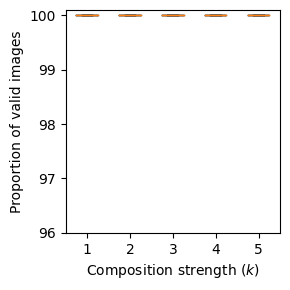

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Caltech256: k=1, median=100.00%
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Caltech256: k=2, median=100.00%
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 10

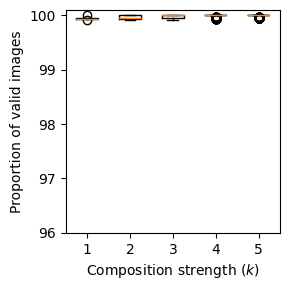

[99.93941841680129, 100.0, 99.93941841680129, 99.95961227786752, 99.91922455573506, 99.93941841680129, 99.93941841680129]
VOC: k=1, median=99.94%
[100.0, 99.93941841680129, 100.0, 99.93941841680129, 99.95961227786752, 99.93941841680129, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.93941841680129, 100.0, 99.95961227786752, 99.91922455573506, 99.93941841680129, 99.93941841680129, 99.97980613893377, 100.0, 99.97980613893377, 99.95961227786752, 99.97980613893377, 99.97980613893377, 99.93941841680129, 100.0, 99.91922455573506, 99.97980613893377, 99.95961227786752, 99.93941841680129, 99.95961227786752, 100.0, 99.93941841680129, 100.0, 99.93941841680129, 99.95961227786752, 99.93941841680129, 100.0, 99.93941841680129, 100.0, 99.93941841680129, 99.95961227786752]
VOC: k=2, median=99.96%
[100.0, 99.93941841680129, 99.97980613893377, 99.95961227786752, 99.95961227786752, 100.0, 99.95961227786752, 100.0, 99.95961227786752, 99.95961227786752, 100.0, 99.95961227786752, 99.95961227786752, 100.0, 100.

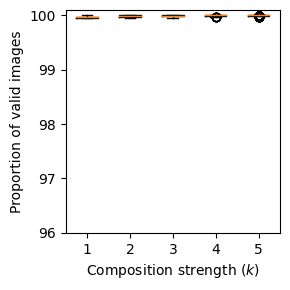

[99.97302268546903, 100.0, 99.95585530349479, 99.98038013488657, 99.95585530349479, 99.97547516860821, 99.95585530349479]
COCO: k=1, median=99.97%
[100.0, 99.97302268546903, 99.99264255058247, 99.97302268546903, 99.98038013488657, 99.97057020232985, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.97547516860821, 100.0, 99.98038013488657, 99.95585530349479, 99.97057020232985, 99.96321275291233, 99.99019006744328, 100.0, 99.98283261802575, 99.98038013488657, 99.98528510116493, 99.98528510116493, 99.97302268546903, 100.0, 99.95830778663397, 99.98038013488657, 99.97302268546903, 99.9656652360515, 99.98038013488657, 100.0, 99.97057020232985, 99.99509503372165, 99.97547516860821, 99.98038013488657, 99.97302268546903, 100.0, 99.96321275291233, 99.98528510116493, 99.96076026977315, 99.9779276517474]
COCO: k=2, median=99.98%
[99.98283261802575, 99.99754751686082, 99.98283261802575, 99.9877375843041, 100.0, 100.0, 100.0, 100.0, 100.0, 99.98528510116493, 100.0, 99.99509503372165, 99.97547516860821, 

In [83]:

for i, dataset in enumerate(datasets):
    result_selfOracle = np.load(f'results/SelfOracle/{dataset}_validity.npy', allow_pickle=True).item()
    with open(f'results/SelfOracle/{dataset}_threshold.txt', 'r') as file:
        for line in file:
            if line.split(':')[0] == 'Threshold':
                th = float(line.split(':')[1])

    data = [[] for _ in range(strength_max)]
    for cmr in result_selfOracle.keys():
        if len(cmr) > strength_max:
            continue
        data[len(cmr)-1].append(len(np.where(np.array(result_selfOracle[cmr]) <= th)[0]) / 
                                 len(result_selfOracle[(0,)]) * 100)

    plt.figure(figsize=(3, 3))
    # 创建箱线图
    plt.boxplot(data, patch_artist=False)

    # 设置图表标题和轴标签
    plt.xlabel(f'Composition strength ($k$)')
    plt.ylabel('Proportion of valid images')

    # 对于后面三个 dataset，设置纵坐标范围 96-100，并设定刻度
    if i > 0:
        plt.ylim(96, 100.1)
        plt.yticks([96, 97, 98, 99, 100])  # 设定刻度

    plt.tight_layout()
    # 保存图像
    plt.savefig(f'results/SelfOracle/{dataset}_validity.pdf', dpi=600)

    # 显示图表
    plt.show()
    
    medians = [np.median(group) if group else np.nan for group in data]
    for k, m in enumerate(medians, start=1):
        print(data[k-1])
        print(f"{dataset}: k={k}, median={m:.2f}%")

In [86]:
# Count the number of invalid images
valid_ratio_all = 0
cmr_all = 0
valid_ratio_all_not_MNIST = 0
cmr_all_not_MNIST = 0
for dataset in datasets:
    validity_followup = get_validity(dataset)
    invalid_num = 0
    invalid_num_mr4, invalid_num_not_mr4 = 0, 0
    cmr_4, cmr_not_4 = 0, 0
    for k in range(strength_max):
        k = k + 1
        for per in permutations(range(len(mrs)), k):
            valid_ratio_all += sum(validity_followup[per]) / len(validity_followup[per])
            cmr_all += 1
            if dataset == 'MNIST':
                if 3 in per:
                    cmr_4 += 1
                    invalid_num_mr4 += len(validity_followup[per]) - sum(validity_followup[per])
                else:
                    cmr_not_4 += 1
                    invalid_num_not_mr4 += len(validity_followup[per]) - sum(validity_followup[per])
            else:
                valid_ratio_all_not_MNIST += sum(validity_followup[per]) / len(validity_followup[per])
                cmr_all_not_MNIST += 1
            invalid_num += len(validity_followup[per]) - sum(validity_followup[per])
    if dataset=='MNIST':
        print(invalid_num_mr4 / cmr_4, invalid_num_not_mr4 / cmr_not_4)
    print(invalid_num)
print(cmr_all, valid_ratio_all / cmr_all)
print(cmr_all_not_MNIST, valid_ratio_all_not_MNIST / cmr_all_not_MNIST)

8706.889215274863 2580.5493527508092
23938076
0
814
5434
14476 0.8346155536085251
10857 0.9999725848795282


In [ ]:
dataset = 'MNIST'
validity_followup = get_validity(dataset)
invalid_2_all, invalid_2_mr4 = 0, 0
for per in permutations(range(len(mrs)), 2):
    invalid_2_all += len(validity_followup[per]) - sum(validity_followup[per])
    if 3 in per:
        invalid_2_mr4 += len(validity_followup[per]) - sum(validity_followup[per])
print( invalid_2_mr4/ invalid_2_all)

0.8910585472236202


In [100]:
import torchvision
from torchvision import transforms

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, cmr=None, transform=None):
        self.transform = transform
        self.data = []
        for idx, (img, label) in enumerate(dataset):
            if cmr is not None:
                for index in cmr:
                    img = mrs[index](img, paras[index])
            self.data.append(img)
            
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data = self.data[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data, []

coco_info =  {
    "data_name": "coco",
    "data": os.path.join("data", "COCO"),
    "annotation_file": os.path.join("data", "COCO", 'annotations', 'image_info_test2014.json'),
    "phase": "test",
    "num_classes": 80
}

def load_testset(dataset_name, transform = None):
    if dataset_name == 'MNIST':
        dataset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)
    elif dataset_name == 'Caltech256':
        caltech256_dataset = torchvision.datasets.Caltech256(root='data', download=True)
        X = [caltech256_dataset[i][0] for i in range(len(caltech256_dataset))]
        y = [caltech256_dataset[i][1] for i in range(len(caltech256_dataset))]
        _, X_test, _, y_test = train_test_split(X, y, test_size=0.1, random_state=18, stratify=y)
        dataset = CustomDataset(list(zip(X_test, y_test)), transform=transform)
    elif dataset_name == 'VOC':
        dataset = torchvision.datasets.VOCDetection('data/VOC', year="2007", image_set='test', transform=transform)
    else: #'COOC'
        dataset = torchvision.datasets.CocoDetection(os.path.join(coco_info['data'],'{}2014'.format(coco_info['phase'])), 
            annFile=coco_info['annotation_file'], transform=transform)
    #print(dataset_name, type(dataset), len(dataset))
    return dataset


def get_max_image_size(dataset_name, dataset):
    max_pixel = 0
    max_size = (0, 0)
    max_index = -1

    for i in range(len(dataset)):
        try:
            sample = dataset[i]
            img = sample[0]  # 获取图像部分

            # 若为 Tensor，需转回 PIL.Image 才能获取大小
            if isinstance(img, torch.Tensor):
                img = transforms.ToPILImage()(img)

            if not isinstance(img, Image.Image):
                continue

            w, h = img.size
            pixel = w * h
            if pixel > max_pixel:
                max_pixel = pixel
                max_size = (w, h)
                max_index = i
        except Exception as e:
            print(f"Error processing {dataset_name} index {i}: {e}")
            continue

    print(f"{dataset_name}: max image size = {max_size} => {max_size[0]}×{max_size[1]} = {max_pixel} pixels")


transform = transforms.ToTensor()
for dataset_name in datasets:
    dataset = load_testset(dataset_name,transform)
    get_max_image_size(dataset_name, dataset)

MNIST: max image size = (28, 28) => 28×28 = 784 pixels
Files already downloaded and verified
Caltech256: max image size = (3174, 2538) => 3174×2538 = 8055612 pixels
VOC: max image size = (500, 500) => 500×500 = 250000 pixels
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
COCO: max image size = (640, 640) => 640×640 = 409600 pixels


# RQ2

In [5]:
def get_model_name(dataset, model):
    for i in range(len(model_names)):
        if dataset+'_'+model in model_names[i]:
            return model_names[i]

def get_validity(dataset):
    filename_validity = 'results/SelfOracle/' + dataset + '_validity.npy'
    filename_threshold = 'results/SelfOracle/' + dataset + '_threshold.txt'
    validity = np.load(filename_validity, allow_pickle=True).item()
    with open(filename_threshold) as f:
        lines = f.readlines()
        threshold = float(lines[1].split(':')[1].strip())
    # print(threshold)
    for mr in validity:
        for i in range(len(validity[mr])):
            if validity[mr][i] <= threshold:
                validity[mr][i] = True
            else:
                validity[mr][i] = False
    return validity

def error_revealing(dataset, mr, pred_source, pred_followup, validity_followup):
    if dataset in  ['MNIST', 'Caltech256']:
        error = []
        for i in range(len(pred_source)):
            if validity_followup[mr][i] and (pred_followup[mr][i] != pred_source[i]):
                error.append(i)
    else:
        pred_f = pred_followup[mr]
        pred_f = pred_f.drop(columns=['img'])
        pred_f = pred_f.to_numpy()
        pred_f = {i: set(row[~pd.isna(row)]) for i, row in enumerate(pred_f)}
        error = []
        for i in range(len(pred_source)):
            if validity_followup[mr][i] and (pred_f[i] != pred_source[i]):
                error.append(i)
    return error

def custom_round(x, k):
    rounded_value = round(x, k)
    if rounded_value.is_integer():
        return int(rounded_value)
    else:
        return rounded_value

In [ ]:
# # Store errors for efficiency
# for model_name in model_names:
#     dataset = model_name.split('_')[0]
#     strength = len(mrs)
#     error = {}

#     if dataset in ['MNIST', 'Caltech256']:
#         pred_source = np.load(os.path.join('predictions', dataset, model_name+'_source.npy'))
#     else:
#         pred_source = pd.read_csv(os.path.join('predictions', dataset, model_name+'_source.csv'), low_memory=False)
#         pred_source = pred_source.drop(columns=['img'])
#         pred_source = pred_source.to_numpy()
#         pred_source = {i: set(row[~pd.isna(row)]) for i, row in enumerate(pred_source)}

#     pred_followup = np.load(os.path.join('predictions', dataset, model_name+'_followup.npy'),allow_pickle=True).item()
#     validity_followup = get_validity(dataset)
#     for mr in pred_followup:
#         error[mr] = error_revealing(dataset, mr, pred_source, pred_followup, validity_followup)
    
#     with open(f'error_revealing/error_{model_name}.pkl', 'wb') as f:
#         pickle.dump(error, f)
#     print(model_name, 'Done')

In [2]:
errors = {}
for model_name in model_names:
    with open(f'error_revealing/error_{model_name}.pkl', 'rb') as f:
        error = pickle.load(f)
        errors[model_name] = error

# RQ2

In [89]:
# Compare the total failure ratio and the total number of faults

for dataset in datasets:
	for model in models[dataset]:
		print(dataset, model)
		model_name = get_model_name(dataset, model)
		validity_followup = get_validity(dataset)
		source_num = len(validity_followup[(0,)])
		with open(f'error_revealing/fault_{model_name}.pkl', 'rb') as f:
			fault_all = pickle.load(f)
		cmr_num = 0
		failure_CMR_MAX, failure_CMR_MEAN = 0, 0
		fault_CMR_MAX, fault_CMR_MEAN = 0, 0

		fault_cmr, fault_max, fault_union = 0, 0, 0
		fault1, fault2, fault3, fault4, fault5 = 0, 0, 0, 0, 0

		for i in range(2, strength_max+1):
			for cmr in permutations(range(len(mrs)), i):
				cmr_num += 1
				failure_com, fault_com = [], []
				failure_com_union = set()
				fault_com_union = set()
				fault_com_max = set()
				for com in cmr:
					failure_com_union.update(errors[model_name][(com,)])
					failure_com.append(len(errors[model_name][(com,)]) / source_num * 100)
					fault_com.append(len(set(fault_all[(com,)].values())))
					fault_com_union.update(set(fault_all[(com,)].values()))
					if len(set(fault_all[(com,)].values())) > len(fault_com_max):
						fault_com_max = set(fault_all[(com,)].values())

				failure_CMR_MAX += len(errors[model_name][cmr]) / source_num * 100 - max(failure_com)
				failure_CMR_MEAN += len(errors[model_name][cmr]) / source_num * 100 - sum(failure_com)/i

				fault_CMR_MAX += len(set(fault_all[cmr].values())) - len(fault_com_max)
				fault_CMR_MEAN += len(set(fault_all[cmr].values())) - sum(fault_com) /i
				fault_CMR_UNION += len(set(fault_all[cmr].values())) - len(fault_com_union)
				#fault_CMR_UNION_intersection += len(set(fault_all[cmr].values()) & fault_com_union)
				fault_CMR_UNION_difference += len(set(fault_all[cmr].values()) - fault_com_union)

				fault_cmr += len(set(fault_all[cmr].values()))
				fault_max += max(fault_com)
				fault_union += len(fault_com_union)
				fault1 += len(set(fault_all[cmr].values()) - fault_com_union)
				fault2 += len((set(fault_all[cmr].values()) & fault_com_union) - fault_com_max)
				fault3 += len(set(fault_all[cmr].values()) & fault_com_max)
				fault4 += len(fault_com_max - set(fault_all[cmr].values()))
				fault5 += len(fault_com_union - (set(fault_all[cmr].values()) | fault_com_max))

		dfr_max = failure_CMR_MAX / cmr_num
		dfr_mean = failure_CMR_MEAN / cmr_num
		dft_max = fault_CMR_MAX / cmr_num
		dft_mean = fault_CMR_MEAN / cmr_num
		fault_cmr, fault_max, fault_union = fault_cmr/cmr_num, fault_max/cmr_num, fault_union/cmr_num
		fault1, fault2, fault3, fault4, fault5 = fault1/cmr_num, fault2/cmr_num, fault3/cmr_num, fault4/cmr_num, fault5/cmr_num
		print(f" & {dfr_max:.2f}\% & {dfr_mean:.2f}\% & {dft_max:.1f} & {dft_mean:.1f} \\\\")
		print(f"{fault_cmr:.1f} {fault_max:.1f} {fault_union:.1f}")
		print(f"{fault1:.0f} {fault2:.0f} {fault3:.0f} {fault4:.0f} {fault5:.0f}")

	print('-------------------------------------------------------------------------------')


MNIST AlexNet
 & 0.98\% & 1.40\% & -7.1 & 8.4 \\
26.7 33.8 46.4
4 3 19 15 9
-------------------------------------------------------------------------------
Caltech256 DenseNet121
 & 10.27\% & 17.17\% & 227.1 & 395.7 \\
706.3 479.2 981.6
293 138 274 205 364
-------------------------------------------------------------------------------
VOC MSRN
 & 5.61\% & 10.38\% & 78.4 & 175.9 \\
399.9 321.5 512.1
101 66 232 89 124
-------------------------------------------------------------------------------
COCO MLD
 & 7.20\% & 24.07\% & 2357.2 & 8471.1 \\
18298.3 15941.0 34156.3
9827 2253 6219 9722 15963
-------------------------------------------------------------------------------


# RQ3

In [ ]:
# # save fault
# for dataset in datasets:
# 	for index, model in enumerate(models[dataset]):
# 		model_name = get_model_name(dataset, model)

# 		pred_followup = np.load(os.path.join('predictions', dataset, model_name+'_followup.npy'),allow_pickle=True).item()
# 		if dataset in ['MNIST', 'Caltech256']:
# 			pred_source = np.load(os.path.join('predictions', dataset, model_name+'_source.npy'))
# 		else:
# 			pred_source = pd.read_csv(os.path.join('predictions', dataset, model_name+'_source.csv'), low_memory=False)
# 			pred_source = pred_source.drop(columns=['img'])
# 			pred_source = pred_source.to_numpy()
# 			pred_source = {i: tuple(sorted(set(row[~pd.isna(row)]))) for i, row in enumerate(pred_source)}
		
# 			for key in pred_followup:
# 				t = pred_followup[key]
# 				t = t.drop(columns=['img'])
# 				t = t.to_numpy()
# 				t = {i: tuple(sorted(set(row[~pd.isna(row)]))) for i, row in enumerate(t)}
# 				pred_followup[key] = t
# 		faults_cmr = {}
# 		faults_all = set()
# 		for i in range(strength_max):
# 			for cmr in permutations(range(len(mrs)), i + 1):
# 				failure = errors[model_name][cmr]
# 				faults = {}
# 				for f in failure:
# 					source_label = pred_source[f]
# 					followup_label = pred_followup[cmr][f]
# 					faults[f] = (source_label, followup_label)
# 				faults_cmr[cmr] = faults
# 				faults_all.update(faults.values())
# 		with open(f'error_revealing/fault_{model_name}.pkl', 'wb') as f:
# 			pickle.dump(faults_cmr, f)
# 		print(dataset, model, len(faults_all))

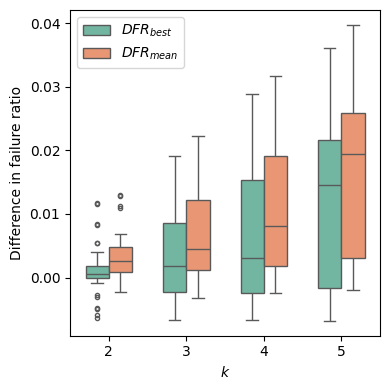


===== Failure Ratio Difference: MNIST, AlexNet =====
k = 2, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0006, Q1 = -0.0000, Q3 = 0.0018
  Min = -0.0064, Max = 0.0118, Negative ratio = 26.19%
k = 2, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.0026, Q1 = 0.0009, Q3 = 0.0048
  Min = -0.0023, Max = 0.0130, Negative ratio = 14.29%
k = 3, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0017, Q1 = -0.0023, Q3 = 0.0086
  Min = -0.0067, Max = 0.0191, Negative ratio = 34.29%
k = 3, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.0045, Q1 = 0.0011, Q3 = 0.0122
  Min = -0.0032, Max = 0.0223, Negative ratio = 15.24%
k = 4, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0030, Q1 = -0.0024, Q3 = 0.0154
  Min = -0.0067, Max = 0.0289, Negative ratio = 42.38%
k = 4, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.0081, Q1 = 0.0018, Q3 = 0.0192
  Min = -0.0024, Max = 0.0318, Negative ratio = 10.24%
k = 5, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0146, Q1 = -0.

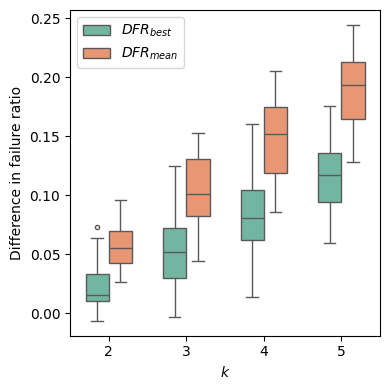


===== Failure Ratio Difference: Caltech256, DenseNet121 =====
k = 2, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0158, Q1 = 0.0100, Q3 = 0.0333
  Min = -0.0065, Max = 0.0732, Negative ratio = 4.76%
k = 2, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.0555, Q1 = 0.0428, Q3 = 0.0701
  Min = 0.0266, Max = 0.0957, Negative ratio = 0.00%
k = 3, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0519, Q1 = 0.0297, Q3 = 0.0724
  Min = -0.0033, Max = 0.1248, Negative ratio = 2.38%
k = 3, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.1012, Q1 = 0.0825, Q3 = 0.1309
  Min = 0.0443, Max = 0.1530, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0810, Q1 = 0.0620, Q3 = 0.1049
  Min = 0.0140, Max = 0.1604, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.1519, Q1 = 0.1192, Q3 = 0.1747
  Min = 0.0860, Max = 0.2057, Negative ratio = 0.00%
k = 5, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.1170, Q1 = 0.0940,

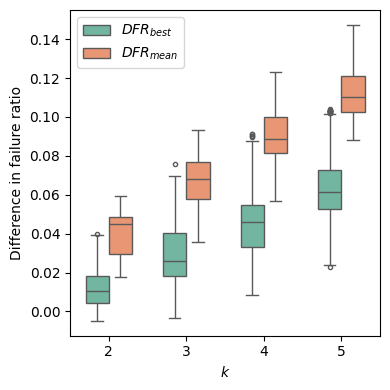


===== Failure Ratio Difference: VOC, MSRN =====
k = 2, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0106, Q1 = 0.0042, Q3 = 0.0182
  Min = -0.0048, Max = 0.0398, Negative ratio = 2.38%
k = 2, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.0449, Q1 = 0.0298, Q3 = 0.0485
  Min = 0.0179, Max = 0.0592, Negative ratio = 0.00%
k = 3, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0262, Q1 = 0.0182, Q3 = 0.0406
  Min = -0.0032, Max = 0.0759, Negative ratio = 1.43%
k = 3, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.0683, Q1 = 0.0581, Q3 = 0.0771
  Min = 0.0355, Max = 0.0934, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0460, Q1 = 0.0331, Q3 = 0.0549
  Min = 0.0083, Max = 0.0915, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.0889, Q1 = 0.0815, Q3 = 0.0999
  Min = 0.0568, Max = 0.1232, Negative ratio = 0.00%
k = 5, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0612, Q1 = 0.0529, Q3 = 0.0725
 

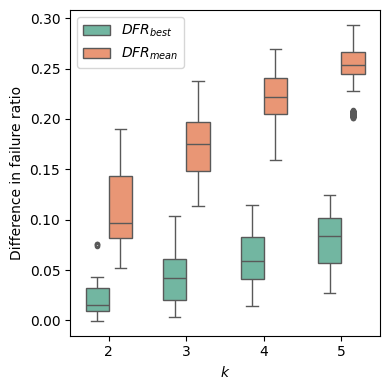


===== Failure Ratio Difference: COCO, MLD =====
k = 2, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0156, Q1 = 0.0090, Q3 = 0.0317
  Min = -0.0006, Max = 0.0755, Negative ratio = 4.76%
k = 2, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.0969, Q1 = 0.0816, Q3 = 0.1438
  Min = 0.0524, Max = 0.1903, Negative ratio = 0.00%
k = 3, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0422, Q1 = 0.0206, Q3 = 0.0608
  Min = 0.0031, Max = 0.1039, Negative ratio = 0.00%
k = 3, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.1750, Q1 = 0.1488, Q3 = 0.1971
  Min = 0.1137, Max = 0.2378, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0587, Q1 = 0.0410, Q3 = 0.0825
  Min = 0.0139, Max = 0.1143, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFR}_{\mathit{mean}}$
  Median = 0.2222, Q1 = 0.2047, Q3 = 0.2410
  Min = 0.1589, Max = 0.2698, Negative ratio = 0.00%
k = 5, Group = $\mathit{DFR}_{\mathit{best}}$
  Median = 0.0838, Q1 = 0.0574, Q3 = 0.1014
  

In [90]:
# draw box plot of Failure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def compare_with_com_failure_4boxplot(dataset, model):
	model_name = get_model_name(dataset, model)
	validity_followup = get_validity(dataset)
	result_delta_max, result_delta_mean = [], []
	source_num = len(validity_followup[(0,)])
	for i in range(1, strength_max): 
		delta_max, delta_mean = [], []
		cmr_num = 0
		for cmr in permutations(range(len(mrs)), i + 1):
			cmr_num += 1
			cmr_failure_ratio = len(errors[model_name][cmr]) / source_num
			com_failure_ratio = []
			for mr in cmr:
				mr = (mr,)
				com_failure_ratio.append(len(errors[model_name][mr]) / source_num)
			delta_max.append(cmr_failure_ratio - max(com_failure_ratio))
			delta_mean.append(cmr_failure_ratio - sum(com_failure_ratio) / len(com_failure_ratio))
		result_delta_max.append(delta_max)
		result_delta_mean.append(delta_mean)
	return result_delta_max, result_delta_mean

def draw_boxplot_failure(dataset, model):
	delta_max, delta_mean = compare_with_com_failure_4boxplot(dataset, model)
	x_labels = [2, 3, 4, 5]
	group_labels = [r"$\mathit{DFR}_{\mathit{best}}$", r"$\mathit{DFR}_{\mathit{mean}}$"]
 
	# 展平为 DataFrame
	records = []
	for i, x in enumerate(x_labels):
		for group, data in zip(group_labels, [delta_max[i], delta_mean[i]]):
			for value in data:
				records.append({'X': x, 'Group': group, 'Value': value})
	df = pd.DataFrame(records)

	# 绘图
	plt.figure(figsize=(4, 4))
	sns.boxplot(x='X', y='Value', hue='Group', data=df, palette='Set2', width=0.6, flierprops=dict(marker='o', markersize=3, linestyle='none') )
	#plt.title('Failure ' + dataset)
	plt.xlabel(f'$k$')
	plt.ylabel('Difference in failure ratio')
	plt.legend()
	plt.tight_layout()
	plt.savefig(f"results/RQ3.1/failure_{dataset}_{model}_box_plot.pdf", dpi=300, bbox_inches='tight')
	plt.show()

	print(f"\n===== Failure Ratio Difference: {dataset}, {model} =====")
	for i, k in enumerate(x_labels):
		for group_name, values in zip(group_labels, [delta_max[i], delta_mean[i]]):
			if not values:
				continue
			series = pd.Series(values)
			median = series.median()
			q1 = series.quantile(0.25)
			q3 = series.quantile(0.75)
			min_val = series.min()
			max_val = series.max()
			neg_ratio = (series < 0).mean()
			print(f"k = {k}, Group = {group_name}")
			print(f"  Median = {median:.4f}, Q1 = {q1:.4f}, Q3 = {q3:.4f}")
			print(f"  Min = {min_val:.4f}, Max = {max_val:.4f}, Negative ratio = {neg_ratio:.2%}")

for dataset in datasets:
	for model in models[dataset]:
		draw_boxplot_failure(dataset, model)

In [85]:
dfr_max_2 = []
dfr_max_5 = []
for dataset in datasets:
	for model in models[dataset]:
		model_name = get_model_name(dataset, model)
		validity_followup = get_validity(dataset)
		source_num = len(validity_followup[(0,)])
		for cmr in permutations(range(len(mrs)), 2):
			cmr_failure_ratio = len(errors[model_name][cmr]) / source_num
			com_failure_ratio = []
			for mr in cmr:
				mr = (mr,)
				com_failure_ratio.append(len(errors[model_name][mr]) / source_num)
			dfr_max_2.append(cmr_failure_ratio - max(com_failure_ratio))
		for cmr in permutations(range(len(mrs)), 5):
			cmr_failure_ratio = len(errors[model_name][cmr]) / source_num
			com_failure_ratio = []
			for mr in cmr:
				mr = (mr,)
				com_failure_ratio.append(len(errors[model_name][mr]) / source_num)
			dfr_max_5.append(cmr_failure_ratio - max(com_failure_ratio))
print(np.mean(dfr_max_2), np.mean(dfr_max_5))

0.01535161766230528 0.06706679754655352


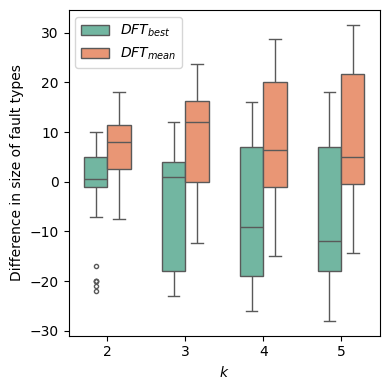


===== Fault Number Difference: MNIST, AlexNet =====
k = 2, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 0.5000, Q1 = -1.0000, Q3 = 5.0000
  Min = -22.0000, Max = 10.0000, Negative ratio = 35.71%
k = 2, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 8.0000, Q1 = 2.5000, Q3 = 11.5000
  Min = -7.5000, Max = 18.0000, Negative ratio = 19.05%
k = 3, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 1.0000, Q1 = -18.0000, Q3 = 4.0000
  Min = -23.0000, Max = 12.0000, Negative ratio = 43.33%
k = 3, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 12.0000, Q1 = 0.0000, Q3 = 16.3333
  Min = -12.3333, Max = 23.6667, Negative ratio = 24.76%
k = 4, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = -9.0000, Q1 = -19.0000, Q3 = 7.0000
  Min = -26.0000, Max = 16.0000, Negative ratio = 55.48%
k = 4, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 6.5000, Q1 = -1.0000, Q3 = 20.0000
  Min = -15.0000, Max = 28.7500, Negative ratio = 27.26%
k = 5, Group = $\mathit{DFT}_{\mathit{best}}$
  Median 

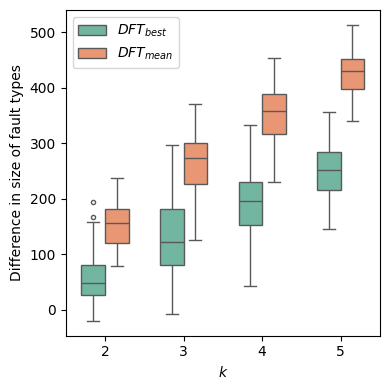


===== Fault Number Difference: Caltech256, DenseNet121 =====
k = 2, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 48.5000, Q1 = 26.2500, Q3 = 80.2500
  Min = -20.0000, Max = 195.0000, Negative ratio = 4.76%
k = 2, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 156.5000, Q1 = 120.5000, Q3 = 182.3750
  Min = 79.0000, Max = 238.0000, Negative ratio = 0.00%
k = 3, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 123.0000, Q1 = 81.0000, Q3 = 182.2500
  Min = -8.0000, Max = 296.0000, Negative ratio = 1.43%
k = 3, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 273.8333, Q1 = 227.2500, Q3 = 300.3333
  Min = 126.3333, Max = 371.3333, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 196.0000, Q1 = 153.0000, Q3 = 230.0000
  Min = 43.0000, Max = 333.0000, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 357.7500, Q1 = 317.0000, Q3 = 388.7500
  Min = 230.5000, Max = 454.5000, Negative ratio = 0.00%
k = 5, Group = $\mathit{DFT

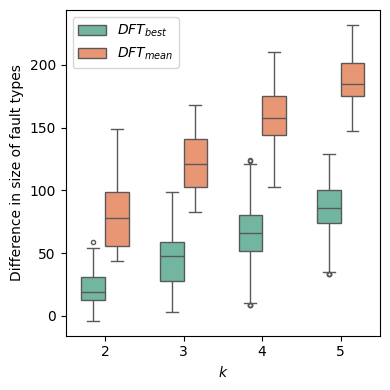


===== Fault Number Difference: VOC, MSRN =====
k = 2, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 19.0000, Q1 = 13.0000, Q3 = 31.2500
  Min = -4.0000, Max = 59.0000, Negative ratio = 9.52%
k = 2, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 78.0000, Q1 = 55.7500, Q3 = 98.7500
  Min = 44.0000, Max = 149.0000, Negative ratio = 0.00%
k = 3, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 47.5000, Q1 = 28.0000, Q3 = 58.7500
  Min = 3.0000, Max = 99.0000, Negative ratio = 0.00%
k = 3, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 121.3333, Q1 = 102.9167, Q3 = 141.0000
  Min = 82.6667, Max = 167.6667, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 66.0000, Q1 = 52.0000, Q3 = 80.0000
  Min = 9.0000, Max = 124.0000, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 157.5000, Q1 = 143.7500, Q3 = 175.2500
  Min = 102.5000, Max = 210.5000, Negative ratio = 0.00%
k = 5, Group = $\mathit{DFT}_{\mathit{best}}$
  Median 

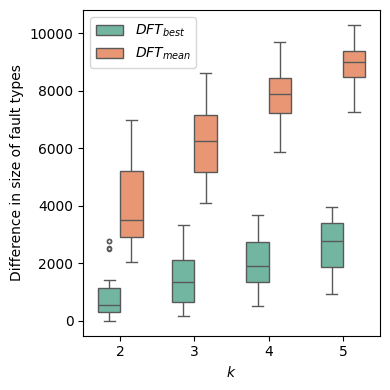


===== Fault Number Difference: COCO, MLD =====
k = 2, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 546.5000, Q1 = 285.2500, Q3 = 1129.0000
  Min = -10.0000, Max = 2766.0000, Negative ratio = 2.38%
k = 2, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 3500.2500, Q1 = 2899.5000, Q3 = 5201.2500
  Min = 2027.0000, Max = 6985.0000, Negative ratio = 0.00%
k = 3, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 1353.0000, Q1 = 663.7500, Q3 = 2118.0000
  Min = 172.0000, Max = 3313.0000, Negative ratio = 0.00%
k = 3, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 6242.8333, Q1 = 5153.9167, Q3 = 7148.3333
  Min = 4107.0000, Max = 8612.3333, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFT}_{\mathit{best}}$
  Median = 1883.5000, Q1 = 1343.5000, Q3 = 2733.0000
  Min = 499.0000, Max = 3674.0000, Negative ratio = 0.00%
k = 4, Group = $\mathit{DFT}_{\mathit{mean}}$
  Median = 7893.6250, Q1 = 7211.5000, Q3 = 8444.8750
  Min = 5865.2500, Max = 9686.0000, Negative ratio = 0.00%
k = 5, Gro

In [91]:
# draw box plot of Fault

def compare_with_com_fault_4boxplot(dataset, model):
	model_name = get_model_name(dataset, model)
	with open(f'error_revealing/fault_{model_name}.pkl', 'rb') as f:
		fault_all = pickle.load(f)
	# for i in range(len(mrs)):
	# 	print(len(set(fault_all[(i,)])), end=' ')
	# print()
	result_delta_union, result_delta_max, result_delta_mean = [], [], []
	result_cmr_union_insert, result_cmr_union_diff = [], []
	for i in range(1, strength_max):
		delta_union, delta_max, delta_mean = [], [], []
		fault_cmr_union_insert, fault_cmr_minus_union, fault_union_minus_cmr = [], [], []
		for cmr in permutations(range(len(mrs)), i + 1):
			f_cmr = set(fault_all[cmr].values())
			com_fault = []
			com_fault_union = set()
			for mr in cmr:
				mr = (mr,)
				com_fault.append(len(set(fault_all[mr].values())))
				com_fault_union.update(fault_all[mr].values())

			delta_union.append(len(f_cmr) - len(com_fault_union))
			delta_max.append(len(f_cmr) - max(com_fault))
			delta_mean.append(len(f_cmr) - sum(com_fault) / len(com_fault))

			fault_cmr_union_insert.append(len(f_cmr & com_fault_union))
			fault_cmr_minus_union.append(len(f_cmr - com_fault_union))
		result_delta_union.append(delta_union)
		result_delta_max.append(delta_max)
		result_delta_mean.append(delta_mean)
		result_cmr_union_insert.append(fault_cmr_union_insert)
		result_cmr_union_diff.append(fault_cmr_minus_union)
	#return result_delta_union, result_delta_max, result_delta_mean, result_cmr_union_insert, result_cmr_union_diff
	return result_delta_max, result_delta_mean

def draw_boxplot_fault(dataset, model):
	delta_max, delta_mean = compare_with_com_fault_4boxplot(dataset, model)

	x_labels = [2, 3, 4, 5]
	group_labels = [r"$\mathit{DFT}_{\mathit{best}}$", r"$\mathit{DFT}_{\mathit{mean}}$"]

	# 展平为 DataFrame
	records = []
	for i, x in enumerate(x_labels):
		for group, data in zip(group_labels, [delta_max[i], delta_mean[i]]):
			for value in data:
				records.append({'X': x, 'Group': group, 'Value': value})

	df = pd.DataFrame(records)

	# 绘图
	plt.figure(figsize=(4, 4))
	sns.boxplot(x='X', y='Value', hue='Group', data=df, palette='Set2', width=0.6, flierprops=dict(marker='o', markersize=3, linestyle='none') )
	#plt.title('Failure ' + dataset)

	plt.xlabel(f'$k$')
	plt.ylabel('Difference in size of fault types')
	plt.legend()
	plt.tight_layout()
	plt.savefig(f"results/RQ3.1/fault_{dataset}_{model}_box_plot.pdf", dpi=300, bbox_inches='tight')
	plt.show()

	print(f"\n===== Fault Number Difference: {dataset}, {model} =====")
	for i, k in enumerate(x_labels):
		for group_name, values in zip(group_labels, [delta_max[i], delta_mean[i]]):
			if not values:
				continue
			series = pd.Series(values)
			median = series.median()
			q1 = series.quantile(0.25)
			q3 = series.quantile(0.75)
			min_val = series.min()
			max_val = series.max()
			neg_ratio = (series < 0).mean()
			print(f"k = {k}, Group = {group_name}")
			print(f"  Median = {median:.4f}, Q1 = {q1:.4f}, Q3 = {q3:.4f}")
			print(f"  Min = {min_val:.4f}, Max = {max_val:.4f}, Negative ratio = {neg_ratio:.2%}")

for dataset in datasets:
	for model in models[dataset]:
		draw_boxplot_fault(dataset, model)

In [81]:
dataset = 'COCO'
model = models[dataset][0]
model_name = get_model_name(dataset, model)
with open(f'error_revealing/fault_{model_name}.pkl', 'rb') as f:
	fault_all = pickle.load(f)
count_all = 0
count = 0
for cmr in permutations(range(len(mrs)), 5):
	count_all += 1
	f_cmr = set(fault_all[cmr].values())
	com_fault = []
	for mr in cmr:
		mr = (mr,)
		com_fault.append(len(set(fault_all[mr].values())))
	if len(f_cmr) - max(com_fault) < 2766:
		count += 1
print(count / count_all)

0.5071428571428571


# RQ3.2 Component

In [ ]:
# check delta Effectiveness w.r.t. Failure
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

for dataset in datasets:
	deltadis, deltaeff = [], []
	filename = f'results/SelfOracle/{dataset}_validity.npy'
	validity_followup = get_validity(dataset) 
	if dataset == 'MNIST':
		extractor = 'lenet5'
	else:
		extractor = 'vgg16'
	save_path = save_path = os.path.join('results', extractor, f'{dataset}.pt')
	source__features = torch.load(save_path)
	followup__features_followup = []
	for i in range(len(mrs)):
		save_path = os.path.join('results', extractor, f'{dataset}_{i}.pt')
		followup__features_followup.append(torch.load(save_path))
	all_features = [source__features] + followup__features_followup
	all_features = [f.cpu().numpy() for f in all_features]
	all_features = np.concatenate(all_features, axis=0)
	pca = PCA(n_components=8)
	reduced_features = pca.fit_transform(all_features)
	source_length = len(source__features)
	source_features = reduced_features[:source_length]
	followup_features = reduced_features[source_length:]
	followup_separated = [followup_features[i * source_length:(i + 1) * source_length] for i in range(7)]
	for model in models[dataset]:
		model_name = get_model_name(dataset, model)
		print(model_name)
		for mr in combinations(range(len(mrs)), 2):
			a,b = mr
			if len(errors[model_name][(a,)]) / sum(validity_followup[(a,)]) > len(errors[model_name][(b,)]) / sum(validity_followup[(b,)]):
				select_com = a
			else:
				select_com = b
			distance1, distance2 = 0, 0
			failure1, failure2 = 0, 0
			failure_com1, failure_com2 = 0, 0
			both_valid_num1 = 0
			both_valid_num2 = 0
			for index in range(source_length):
				#print(validity[mr][index],  validity[(select_com,)][index])
				delta_1 = followup_separated[a][index] - source_features[index]
				delta_2 = followup_separated[b][index] - source_features[index]
				delta = followup_separated[select_com][index] - source_features[index]
				combined = delta_1 + delta_2
				if validity_followup[mr][index] and validity_followup[(select_com,)][index]:
				#if validity_followup[mr][index]:
					distance1 += np.linalg.norm(combined) - np.linalg.norm(delta)
					both_valid_num1 += 1
					if index in errors[model_name][(select_com,)]:
						failure_com1 += 1
					if index in errors[model_name][mr]:
						failure1 += 1
				if validity_followup[(b,a)][index] and validity_followup[(select_com,)][index]:
				#if validity_followup[(b,a)][index]:
					distance2 += np.linalg.norm(combined) - np.linalg.norm(delta)
					both_valid_num2 += 1
					if index in errors[model_name][(select_com,)]:
						failure_com2 += 1
					if index in errors[model_name][(b,a)]:
						failure2 += 1
			eff1 = failure1 - failure_com1
			eff2 = failure2 - failure_com2
			deltadis.append((distance1/both_valid_num1+distance2/both_valid_num2)/2)
			deltaeff.append((eff1/both_valid_num1+eff2/both_valid_num2)/2)
			#print(mr, (distance1/both_valid_num1+distance2/both_valid_num2)/2, (eff1/both_valid_num1+eff2/both_valid_num2)/2)
		correlation, p_value = spearmanr(deltadis, deltaeff)
		print(correlation, p_value)
		plt.scatter(deltadis, deltaeff)
		plt.show()

MNIST AlexNet
MNIST AlexNet k=2
delta distance: [0.07486999080480611, 0.030257797897049573, 0.07684528952370218, 0.052420179564647645, 0.02680365325410001, 0.026400411639249687, 0.03411257995861995, 0.5774479766878309, 0.18950395416864363, 0.06106400553144295, 0.028580858875186577, 0.11205538206311456, 0.08599203103633858, 0.0045174845996458265, 0.0011901133267839732, 0.4289935810775588, 0.09041582436453355, 0.017605289226930217, 1.358564493498895, 0.15208690721737672, 1.5000167137935312]
delta failure ratio: [0.0010033109260559848, 0.0004004004164484972, 0.0016231139035651388, 0.001277037483006567, 0.00015307683820238286, 0.0026767676767676767, 0.0011047506051254873, 0.008950826093149124, 0.009040688910989837, 0.00020586721782713902, 0.0018336478156722412, 0.0022262968147973784, 0.0007223947132336875, -0.0003067327854241007, 0.0007078572440409608, 0.03179524237860856, 0.005185436143982232, 0.00605148273107276, 0.005402264478454532, 0.006914354200983507, 0.01760668563772661]
21 0.68961

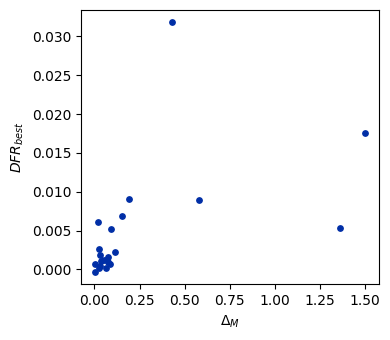

MNIST AlexNet k=3
delta distance: [0.1038976286021543, 0.60934721046893, 0.23355419056240498, 0.08862908800048047, 0.055394101488283574, 0.18058022836196064, 0.13383721987125582, 0.03167800498187376, 0.02788519658772884, 0.4810100904381525, 0.1739380716049679, 0.10121206444104737, 1.3913181754219819, 0.18281262209987925, 1.5299799488788475, 0.6715947677876205, 0.2702585842233904, 0.07092548644600738, 0.03534041638929054, 0.8147669675582763, 0.21377429312629045, 0.11563273056683755, 1.4690525180884375, 0.22678471854431603, 1.5239440563403006, 0.5667264789304588, 0.11636073733233071, 0.03705468858892067, 1.396792219660082, 0.18207286665285646, 1.5074710970649567, 1.7797183003304706, 0.581851413203891, 2.0259318873162737, 1.7400036547384028]
delta failure ratio: [0.002261444787844028, 0.012402151899368446, 0.009850459585656625, 0.0004298689568885776, 0.003352402250399528, 0.006002675648930937, 0.0025145237598261055, 0.0003585682425975119, 0.003022542378600559, 0.03493108384060026, 0.00645

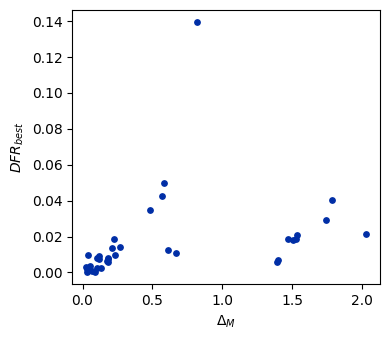

MNIST AlexNet k=4
delta distance: [0.7030773651042818, 0.31188542976181494, 0.0986688616650649, 0.062268780418622376, 0.8539962015966998, 0.28043441754223636, 0.18417769201754522, 1.501638084099157, 0.25763052928331526, 1.555052789114517, 0.6145374076723781, 0.2010107482356596, 0.12253832634066475, 1.4319775497942502, 0.2145192933854827, 1.5405920971502731, 1.8555291670172975, 0.6652173978601836, 2.1022794023451628, 1.7889996237335781, 0.9291294406697567, 0.24672835759709397, 0.14641868405461955, 1.5095393975376519, 0.2610781270706745, 1.5353548824216228, 1.9562735590181466, 0.6698661446475914, 1.9569980909075255, 1.7652471546601645, 1.8503763097953438, 0.663610866648547, 2.042569463494368, 1.7824723147464352, 2.5190538950649453]
delta failure ratio: [0.018820307875569642, 0.01540937323507541, 0.000820209850944361, 0.0034354048940761074, 0.14289232531090298, 0.013538955638239578, 0.013431286338032247, 0.018834988665948918, 0.019605642478231013, 0.02108027804100537, 0.041503702131865765

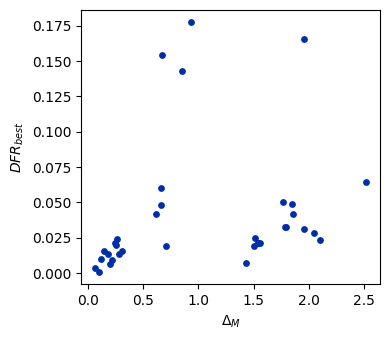

MNIST AlexNet k=5
delta distance: [0.965648754736218, 0.31402067456874583, 0.21467524932077162, 1.5431093866120507, 0.29311844346488347, 1.5665560196213533, 2.021290990424618, 0.7361135091943628, 2.0249174801001275, 1.8083969205976405, 1.9298691660367526, 0.7451536662026742, 2.1185878208159488, 1.8333183341288808, 2.599255122302485, 2.0266015996810354, 0.7443923101857025, 1.9803440233925598, 1.7998994980125282, 2.4489551721341214, 2.5733899258981703]
delta failure ratio: [0.17960690157889642, 0.020264711473892798, 0.017881060878063175, 0.025462906233239966, 0.025410338098107065, 0.022436062690767013, 0.1689772991602256, 0.15981621854806197, 0.031100556158600936, 0.05446182560969872, 0.05203881913818885, 0.06056143921864599, 0.025359255664192896, 0.036506323113251554, 0.0635588681497945, 0.19640654178235403, 0.189090903594841, 0.03737877256370699, 0.06141829248501755, 0.18409823906971304, 0.07190532866622637]
21 0.34675324675324676 0.12357109818269173


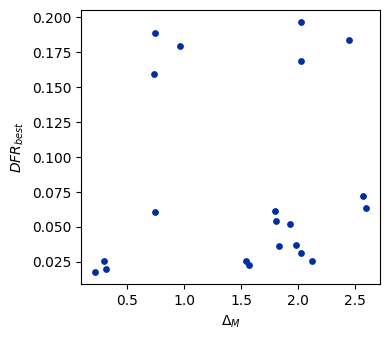

Caltech256 DenseNet121
Caltech256 DenseNet121 k=2
delta distance: [0.3422700200437993, 0.03445444487543988, 0.29249730061682483, 0.8592798362508275, 0.8625400805202663, 0.3269260646480238, 0.07421608670100166, 0.48748548232488714, 0.43536476878043445, 0.3872007478937648, 0.3700868957102474, 0.07678306537349604, 0.1129713970760102, 0.046174588715745826, 0.04552594472875357, 0.4153593480355772, 0.3463311466744078, 0.3885710277186621, 0.7166367120790116, 0.33145438026842516, 0.35535189205380835]
delta failure ratio: [0.03332244364586737, 0.0029402156158118264, 0.014537732767069584, 0.06092780137210062, 0.05798758575628879, -0.003920287487749101, 0.012087553087226397, 0.045083306109114665, 0.0359359686377001, 0.025808559294348252, 0.024501796798431886, 0.008493956223456386, 0.014211042143090493, 0.00914733747141457, 0.006207121855602744, 0.0199281280627246, 0.01470107807905913, 0.02629859523031689, 0.06844168572361974, 0.0009800718719372753, 0.015191114015027768]
21 0.8740259740259739 2.25

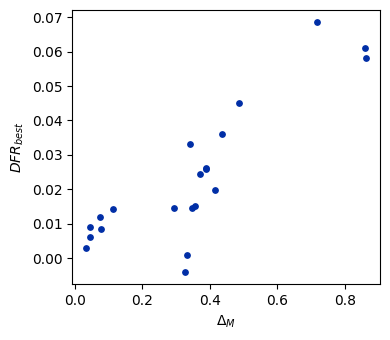

Caltech256 DenseNet121 k=3
delta distance: [0.3896687922346738, 0.712672172595989, 1.260458388580913, 1.2066192942777256, 0.668853247110833, 0.33972790157543115, 0.9372221213505507, 0.9010823186570934, 0.3644157005095681, 1.2205688144991786, 1.1631867969174357, 0.6256621905441159, 1.6984857637218163, 1.1895155801348445, 1.1799904153401668, 0.5599336590206949, 0.5380838659456986, 0.44515726936580075, 0.43360667228357963, 0.8947174714138457, 0.8033872079215745, 0.8110820809096264, 1.142696845909388, 0.7465665887545931, 0.7287497629532106, 0.5191058912211536, 0.4045667615464073, 0.4524132956947544, 0.805238291444335, 0.4299078628876806, 0.40196563885286074, 1.1134181183387704, 0.7302443170434221, 0.6949270245636664, 1.0554032231020105]
delta failure ratio: [0.0435587498638789, 0.05232494827398454, 0.1002940215615812, 0.08052923881084613, 0.02874877491016008, 0.023249482739845367, 0.07720788413372535, 0.06365022323859305, -0.0008711749972775783, 0.08379614505063704, 0.07230752477403898, 0.

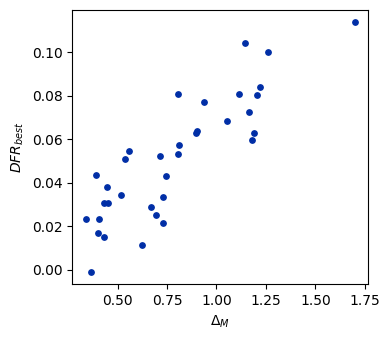

Caltech256 DenseNet121 k=4
delta distance: [0.7670764200382084, 1.339492282587485, 1.2532980447483129, 0.7168157683223156, 1.6668960978277532, 1.5612006195463166, 1.0343845734117363, 2.0876770664282733, 1.5832026334359572, 1.5250681099092127, 1.3003292579950687, 1.2096792863878463, 0.6735800637071602, 1.7669078677959213, 1.263892264894108, 1.2202451851502503, 2.049512744362865, 1.548097640577775, 1.4851945976143657, 2.022190012664112, 0.9910507351143822, 0.8664145621812988, 0.8789750182755527, 1.2297431264394356, 0.8413268220623592, 0.7852650171795482, 1.5782761948981745, 1.1920501723143966, 1.1316717942205246, 1.4687735014524606, 1.2013891634120475, 0.8255817432341513, 0.7516187298266077, 1.138411896632905, 1.4435494657081351]
delta failure ratio: [0.06671294783839703, 0.1157437656539257, 0.0875122508983992, 0.03648045301099857, 0.12022214962430579, 0.0994228465643036, 0.053236959599259503, 0.14826309484917782, 0.09966786453228792, 0.08455842317325492, 0.09517586845257542, 0.079943918

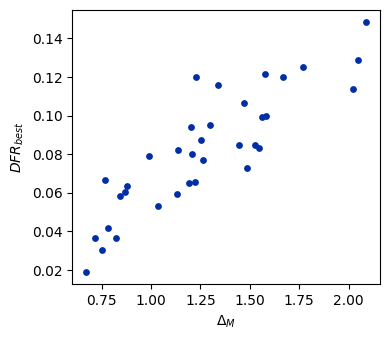

Caltech256 DenseNet121 k=5
delta distance: [1.7463600569128102, 1.613212215980906, 1.088643813862476, 2.1584576690536457, 1.6593431922425685, 1.5723790027948428, 2.4757461994875025, 1.9836546630760974, 1.8785553897441665, 2.407718408199602, 2.1206075414143823, 1.6247640598768576, 1.532413504180774, 2.08914366049304, 2.3727184584376264, 1.663976854548225, 1.2834156891269208, 1.1932185924521828, 1.551791402727583, 1.8945963495496272, 1.5271329342626057]
delta failure ratio: [0.13579984754437557, 0.11275726886638353, 0.06320102363062179, 0.16169280191658494, 0.11524284003049111, 0.09407056517477946, 0.1643498856582816, 0.11725198736796254, 0.10349831209844275, 0.15395023412828046, 0.14246433627354893, 0.0930932157247087, 0.07978874006316021, 0.12562887945115978, 0.12769519764782752, 0.13681531090057716, 0.0772432756179898, 0.067619514319939, 0.12198355657192644, 0.12499727757813354, 0.09732113688337148]
21 0.8805194805194804 1.400414895786948e-07


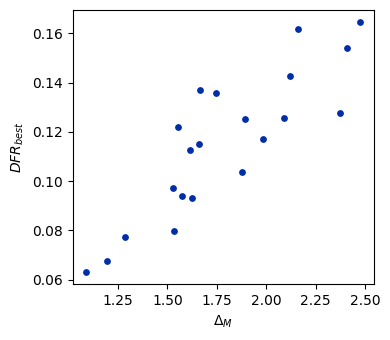

VOC MSRN
VOC MSRN k=2
delta distance: [0.4115608186643758, 0.08881678789173576, 0.4149813069541374, 0.8120061449599666, 0.8930232794351303, 0.3182976290020564, 0.14352501588098718, 0.5828581009173032, 0.5567421062579175, 0.46905410741405984, 0.41947806258470416, 0.1338621717713999, 0.1657144482094695, 0.10763757657971038, 0.07398183520670297, 0.5077947290341702, 0.4524568189759764, 0.39631267768140993, 0.9110744122327711, 0.26386232294214523, 0.31620185665227735]
delta failure ratio: [0.008284501919579712, 0.0024247322691452818, 0.013133966457870277, 0.03384522125681956, 0.039098807839967664, -0.00040412204485754675, 0.003735864297253635, 0.02292929292929293, 0.016572352465642683, 0.009698929076581127, 0.008890684986866033, 0.00404040404040404, 0.006265157639450283, 0.002020610224287735, 0.0017175186906445749, 0.02172594987873888, 0.011315417256011316, 0.0167710648615882, 0.03788644170539503, 0.016370250606305578, 0.01363911901394221]
21 0.8376623376623376 2.1620540095349673e-06


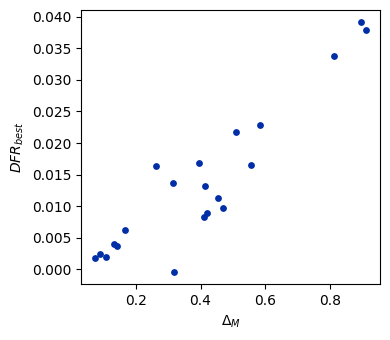

VOC MSRN k=3
delta distance: [0.5279415654003593, 0.9010393674627589, 1.3262570346584863, 1.3272228685904008, 0.7235396415930593, 0.5243279641225553, 0.9547007596164776, 0.9947070650725748, 0.40652544317024203, 1.3006690867908108, 1.3252154316540123, 0.7223408938000208, 1.7188988337303934, 1.1033626871373328, 1.1980155262050545, 0.7219469856087005, 0.7181681743254561, 0.5977378738268125, 0.5451737530461753, 1.0843113464112835, 0.9786833141501153, 0.9304448924936125, 1.446628013071351, 0.8062249492970327, 0.7691949979208483, 0.6679757151775799, 0.5757859389798171, 0.5136039918563965, 1.0608636963995344, 0.4196087787832791, 0.4191986428046938, 1.410215642344127, 0.7589773529760562, 0.7509201352751808, 1.1860527654039248]
delta failure ratio: [0.010069374284367211, 0.021014346332592443, 0.04182663164275611, 0.04617094362497474, 0.007678318852293393, 0.015693406075301407, 0.0398733750926113, 0.039806021418468375, 0.0013807503199299521, 0.04910082845019196, 0.050683639792550694, 0.019532565

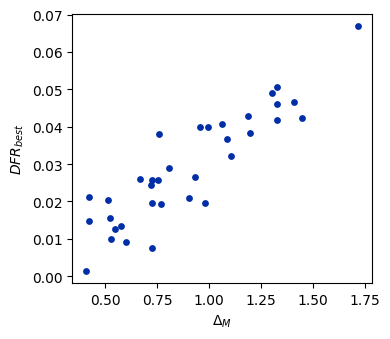

VOC MSRN k=4
delta distance: [1.024890057678864, 1.4733271685390592, 1.444267258644225, 0.8358030543609476, 1.840448835495948, 1.8062004972252534, 1.1963034158806785, 2.221604843415491, 1.6070995825006797, 1.627953304650166, 1.4451002099772625, 1.4380364868196003, 0.8288281166925651, 1.8547795344749558, 1.2406152072595633, 1.298378957629569, 2.19993282418472, 1.5807974861602698, 1.623120296406005, 2.0067028091870274, 1.2413224203703306, 1.1115654216808424, 1.062341552922511, 1.5983268222333429, 0.9620970339642055, 0.8920464582589207, 1.9658362831032907, 1.3254589565084232, 1.2609111667662953, 1.7113847280882288, 1.5600283915055169, 0.9134347682040285, 0.8691785691504591, 1.3303054049455525, 1.6751695583516952]
delta failure ratio: [0.025005051525560717, 0.04699602613322556, 0.047383309759547375, 0.01257829864619115, 0.05845456994679058, 0.060466760961810466, 0.027362430120563067, 0.07445948676500305, 0.04276958308075707, 0.046844480366403984, 0.05513740149525156, 0.05362194382703577, 0

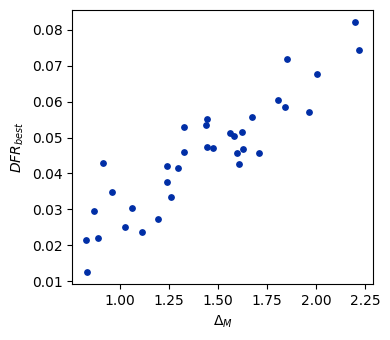

VOC MSRN k=5
delta distance: [1.9871373253603692, 1.9290089540052568, 1.3166978884848897, 2.362283878740682, 1.7497967434006123, 1.742530461042797, 2.725112051976893, 2.111230353505119, 2.0973667717906546, 2.502919267663661, 2.3383911690722323, 1.7210477302431653, 1.7339640697184702, 2.139285210973728, 2.480435711855984, 2.116288511676264, 1.4789340354912779, 1.389524865858727, 1.858915718632562, 2.2223977545590055, 1.8208878599353677]
delta failure ratio: [0.06372499494847446, 0.06494578029231494, 0.030578568060887722, 0.07954805684650101, 0.04819323769111608, 0.048622617363777154, 0.09228632046878163, 0.05970061291843474, 0.06148885296692933, 0.07731191486495585, 0.08653094901326866, 0.05663938842863879, 0.05469791877146898, 0.07312420017511954, 0.0863827709301542, 0.062440223614198175, 0.057432295877122105, 0.036709436249747415, 0.04988213107024988, 0.06600660066006601, 0.05951539031454166]
21 0.9181818181818181 4.463472446313269e-09


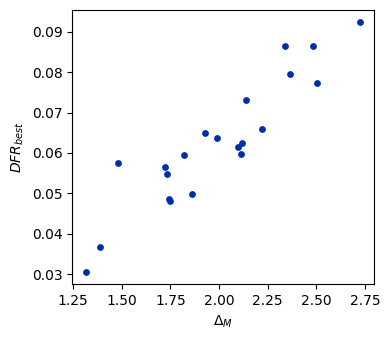

COCO MLD
COCO MLD k=2
delta distance: [0.4190773304751794, 0.05914899489493848, 0.39360694030465926, 0.49246032832009423, 0.8643274233879664, 0.2940987882968027, 0.10342613430128443, 0.5744465166902486, 0.5475811770915997, 0.46597899515599867, 0.4204369009105609, 0.09375959470799393, 0.12653778925057468, 0.07278738536469762, 0.05065030824789447, 0.48123219313555304, 0.4341263117127721, 0.37142280798000404, 0.564613878352639, 0.24958342706917824, 0.28192567956747006]
delta failure ratio: [0.009763516828574232, 0.0016926913670840676, 0.011750564223334314, 0.03522844128408596, 0.07545966338015417, 0.0030542948312217693, 0.012115266707541386, 0.07421443814850247, 0.026964693181539365, 0.008880166809763277, 0.025050911499865054, 0.0076777785954325805, 0.019850049678786553, 0.002072994430222939, -0.00036803493878352183, 0.030252471968005498, 0.016963081074451124, 0.03322128714085924, 0.037422725934648224, 0.039772801197249796, 0.011002219017477572]
21 0.7376623376623377 0.0001354741498121529

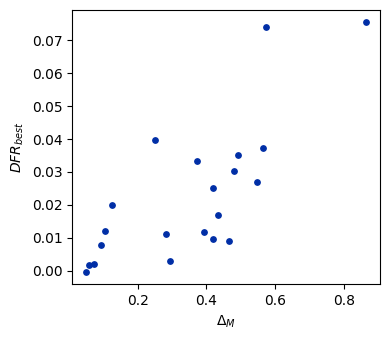

COCO MLD k=3
delta distance: [0.4998151270275269, 0.8837922832664825, 0.9929665278316694, 1.3013169733119059, 0.7021776299985923, 0.4683927928087767, 0.5915421651715087, 0.9325190115751348, 0.35297163521137226, 0.9439962917886859, 1.2753120206840622, 0.6699052846714567, 1.3676734234511578, 0.7653876592098657, 1.1405713340869277, 0.6735040729805745, 0.6676686842371499, 0.5556959722860791, 0.510779306748876, 1.05252834486162, 0.9542104544279265, 0.9050647473629777, 1.0860892682729035, 0.7749702643590504, 0.7319654275777466, 0.5995092359909883, 0.5185522588941393, 0.4540765521228652, 0.6707449145334522, 0.36346021972908904, 0.3520349575372657, 1.034348641961217, 0.7038851588900602, 0.6935001009129763, 0.8167591952054751]
delta failure ratio: [0.012457887678670725, 0.024936218231773135, 0.04422202597062768, 0.08184918064959278, 0.013062996761848689, 0.013259248356392894, 0.03981162411603223, 0.07760115134268798, 0.005127191063598893, 0.04375183985869885, 0.08422464265855494, 0.014387695025

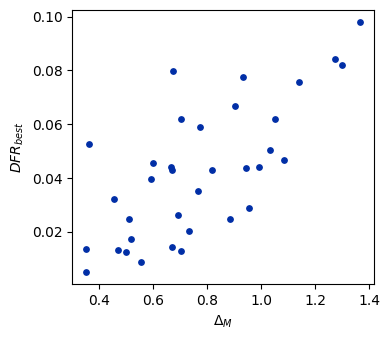

COCO MLD k=4
delta distance: [0.9700296703663055, 1.0968790144564509, 1.381653447479901, 0.7798885434099034, 1.4764676299343975, 1.7569881568695138, 1.1464923669236553, 1.8578722674934651, 1.2519677554195405, 1.571455618454087, 1.0452510575933769, 1.3518809444691924, 0.7426736354473911, 1.4605748969658616, 0.8595495473967169, 1.2080397005881431, 1.8153226640109805, 1.1995311950386756, 1.5405879406254746, 1.631606106692173, 1.1671873189758686, 1.0468065816548564, 0.9991147071224273, 1.194510018226658, 0.8891738214789947, 0.8178602391906398, 1.580357255746905, 1.2641117132629756, 1.199778706881269, 1.3263729975058827, 1.1405067536629452, 0.8163889322196117, 0.774917917929063, 0.917938181309391, 1.2705890616258786]
delta failure ratio: [0.02775631275962451, 0.04920395446963006, 0.08323316324861807, 0.015820740522683414, 0.059297623720276055, 0.09317453308474799, 0.02937845484577895, 0.10602083537762073, 0.045553879239852164, 0.08205360939390968, 0.04891059922153534, 0.08560658097013706, 0

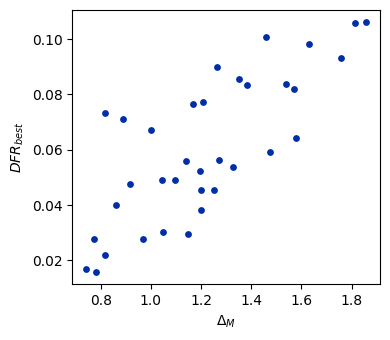

COCO MLD k=5
delta distance: [1.5801775771181537, 1.841576743078419, 1.2302409341923322, 1.9556019483002862, 1.3520030540335897, 1.6501533188123458, 2.3316079732053905, 1.720878931122474, 2.0150013835861555, 2.1140598700000752, 1.9108291091466916, 1.2971383764658844, 1.6159460319495327, 1.7219451602310103, 2.0683573217774893, 1.687452228212097, 1.375472990911633, 1.2896947565652732, 1.431188049480106, 1.8079983958944221, 1.373346905599077]
delta failure ratio: [0.06372371046348087, 0.09468751022143722, 0.030747923003957747, 0.10885053805645514, 0.05040742648742358, 0.08405271808458441, 0.11631688908514047, 0.0586945589245412, 0.09336240310077516, 0.10642539986262385, 0.1084807264579858, 0.05004088574886335, 0.08560167468027344, 0.10126327508600483, 0.10616761521604026, 0.06910401079357291, 0.0999368206688422, 0.04038554315384931, 0.05819534731591644, 0.07021198740749823, 0.06160186434441311]
21 0.8597402597402597 5.903424517646315e-07


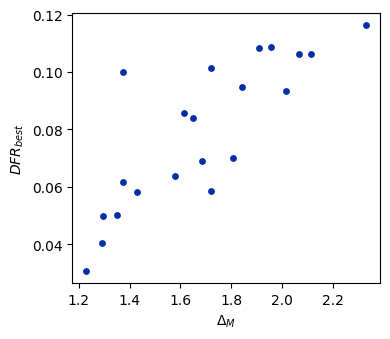

In [92]:
# check delta Effectiveness w.r.t. Failure, 2-5way
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

for dataset in datasets:
	# if dataset != 'VOC':
	# 	continue
	filename = f'results/SelfOracle/{dataset}_validity.npy'
	validity_followup = get_validity(dataset) 
	if dataset == 'MNIST':
		extractor = 'lenet5'
	else:
		extractor = 'vgg16'
	save_path = os.path.join('results', extractor, f'{dataset}.pt')
	source__features = torch.load(save_path)
	followup__features_followup = []
	for i in range(len(mrs)):
		save_path = os.path.join('results', extractor, f'{dataset}_{i}.pt')
		followup__features_followup.append(torch.load(save_path))
	all_features = [source__features] + followup__features_followup
	all_features = [f.cpu().numpy() for f in all_features]
	all_features = np.concatenate(all_features, axis=0)
	pca = PCA(n_components=8)
	reduced_features = pca.fit_transform(all_features)
	source_length = len(source__features)
	source_features = reduced_features[:source_length]
	followup_features = reduced_features[source_length:]
	followup_separated = [followup_features[i * source_length:(i + 1) * source_length] for i in range(7)]
 
	for model in models[dataset]:
		print(dataset, model)
		model_name = get_model_name(dataset, model)
		for i in range(2, strength_max+1):
			deltadis, deltaeff = [], []
			for com in combinations(range(len(mrs)), i):
				select_com = com[0]
				for j in range(1, len(com)):
					if len(errors[model_name][(com[j],)]) / sum(validity_followup[(com[j],)]) > len(errors[model_name][(select_com,)]) / sum(validity_followup[(select_com,)]):
						select_com = com[j]
				delta_d = []
				delta_e = []
				for cmr in permutations(com):
					d, f, f_c, v_p_num = 0, 0, 0, 0
					for index in range(source_length):
						if validity_followup[cmr][index] and validity_followup[(select_com,)][index]:
							v_p_num += 1
							delta_com = []
							for c in cmr:
								delta_com.append(followup_separated[c][index] - source_features[index])
							combined = sum(delta_com)
							delta = followup_separated[select_com][index] - source_features[index]
							d += np.linalg.norm(combined) - np.linalg.norm(delta)

							if index in errors[model_name][(select_com,)]:
								f_c += 1
							if index in errors[model_name][cmr]:
								f += 1
					delta_d.append(d / v_p_num)
					delta_e.append((f - f_c) / v_p_num)
				deltadis.append(sum(delta_d) / len(delta_d))
				deltaeff.append(sum(delta_e) / len(delta_e))
			correlation, p_value = spearmanr(deltadis, deltaeff)
			print(dataset, model, f'k={i}')
			print('delta distance:', deltadis)
			print('delta failure ratio:', deltaeff)
			print(len(deltadis), correlation, p_value)
			plt.figure(figsize=(4, 3.5))
			plt.scatter(deltadis, deltaeff,  color="#002EA6", s=15)
			plt.xlabel(r"$\Delta_M$")
			plt.ylabel(r"$\mathit{DFR}_{\mathit{best}}$")
			#plt.title("Scatter Plot")
			plt.tight_layout()
			plt.savefig(f"results/RQ3.2/failure_{dataset}_{model}_{i}_scatter_plot.pdf", dpi=300, bbox_inches='tight')
			plt.show()

In [ ]:
# check delta Effectiveness w.r.t. Fault
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

for dataset in datasets:
	deltadis, deltaeff = [], []
	filename = f'results/SelfOracle/{dataset}_validity.npy'
	validity_followup = get_validity(dataset) 
	if dataset == 'MNIST':
		extractor = 'lenet5'
	else:
		extractor = 'vgg16'
	save_path = os.path.join('results', extractor, f'{dataset}.pt')
	source__features = torch.load(save_path)
	followup__features_followup = []
	for i in range(len(mrs)):
		save_path = os.path.join('results', extractor, f'{dataset}_{i}.pt')
		followup__features_followup.append(torch.load(save_path))
	all_features = [source__features] + followup__features_followup
	all_features = [f.cpu().numpy() for f in all_features]
	all_features = np.concatenate(all_features, axis=0)
	pca = PCA(n_components=8)
	reduced_features = pca.fit_transform(all_features)
	source_length = len(source__features)
	source_features = reduced_features[:source_length]
	followup_features = reduced_features[source_length:]
	followup_separated = [followup_features[i * source_length:(i + 1) * source_length] for i in range(7)]
	for model in models[dataset]:
		model_name = get_model_name(dataset, model)
		print(model_name)
		with open(f'error_revealing/fault_{model_name}.pkl', 'rb') as f:
			fault_all = pickle.load(f)
		for mr in combinations(range(len(mrs)), 2):
			a,b = mr
			#print(len(set(fault_all[(a,)].values())), len(set(fault_all[(b,)].values())))
			if len(set(fault_all[(a,)].values())) > len(set(fault_all[(b,)].values())):
				select_com = a
			else:
				select_com = b
			distance1, distance2 = 0, 0
			fault1, fault2 = set(), set()
			fault_com1, fault_com2 = set(), set()
			both_valid_num1 = 0
			both_valid_num2 = 0
			for index in range(source_length):
				#print(validity[mr][index],  validity[(select_com,)][index])
				delta_1 = followup_separated[a][index] - source_features[index]
				delta_2 = followup_separated[b][index] - source_features[index]
				delta = followup_separated[select_com][index] - source_features[index]
				combined = delta_1 + delta_2
				if validity_followup[mr][index] and validity_followup[(select_com,)][index]:
					distance1 += np.linalg.norm(combined) - np.linalg.norm(delta)
					#print(mr, distance1, index)
					both_valid_num1 += 1
					if index in errors[model_name][(select_com,)]:
						fault_com1.add(fault_all[(select_com,)][index])
					if index in errors[model_name][mr]:
						fault1.add(fault_all[mr][index])
				if validity_followup[(b,a)][index] and validity_followup[(select_com,)][index]:
					distance2 += np.linalg.norm(combined) - np.linalg.norm(delta)
					both_valid_num2 += 1
					if index in errors[model_name][(select_com,)]:
						fault_com2.add(fault_all[(select_com,)][index])
					if index in errors[model_name][(b,a)]:
						fault2.add(fault_all[(b,a)][index])
			eff1 = len(fault1) - len(fault_com1)
			eff2 = len(fault2) - len(fault_com2)
			deltadis.append((distance1/both_valid_num1+distance2/both_valid_num2)/2)
			deltaeff.append((eff1+eff2)/2)
			#print(mr, select_com, distance1/both_valid_num1, distance2/both_valid_num2, eff1, eff2)
		correlation, p_value = spearmanr(deltadis, deltaeff)
		print(correlation, p_value)
		#plt.scatter(deltadis, deltaeff)
		#plt.show()

MNIST_AlexNet_9938
0.6379221224515227 0.0018623507055818037
Caltech256_DenseNet121_6838
0.8077922077922077 9.502614930342749e-06
VOC_MSRN
0.797530440805781 1.4919868128010888e-05
COCO_MLD
0.6935064935064935 0.00048989740104046


MNIST AlexNet
MNIST AlexNet k=2
delta distance: [0.21335868835685276, 0.03025781769778948, 0.3536385083481191, 0.05242019063432583, 0.02680369191677767, 0.02640047156600037, 0.034112597974823355, 0.3797588162652935, 0.18950406594927643, 0.061064103905199243, 0.02858096125321142, 0.4498521375231937, 0.0859920495163311, 0.004517523955440695, 0.0011901670638495001, 0.4289939283189196, 0.09041598430591545, 0.01760541393856407, 1.3585656485219377, 1.6170468306518777, 1.5000179854763998]
delta fault number: [6.0, 3.0, 3.5, 1.5, 0.0, -2.0, 6.0, 4.5, 6.5, 3.0, 5.0, 3.5, 1.0, 0.0, 1.0, 5.0, 1.0, 3.0, 5.0, 8.0, 11.0]
21 0.6956037625128055 0.0004632167910440467


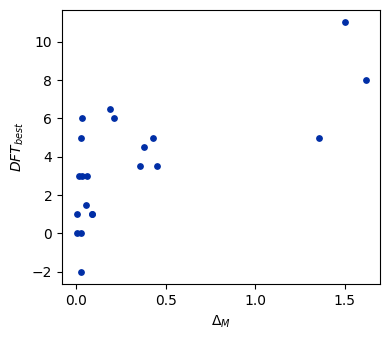

MNIST AlexNet k=3
delta distance: [0.24234376074852793, 0.7389394471703086, 0.23355430279191627, 0.08862921960485466, 0.0553942647397923, 0.4531642916777921, 0.13383725050099196, 0.03167808138608632, 0.027885308365701435, 0.4810104358844613, 0.17393828557857896, 0.10121225396051974, 1.391319397507231, 1.645654886357501, 1.5299812588001849, 0.4608732300775513, 0.2702587203189952, 0.07092562672858083, 0.035340572506285445, 0.8147674991717867, 0.21377465268397597, 0.11563304282336384, 1.4690538414306011, 1.6935176603696223, 1.5239454428705557, 0.5667267975423429, 0.1163608898087621, 0.03705482450285583, 1.3967934841017542, 1.6439330253173816, 1.5074723922194906, 1.7797196954149397, 1.354334732403468, 2.0259334772424977, 3.1286165528723884]
delta fault number: [11.0, 9.166666666666666, 4.5, 0.5, 0.5, 5.166666666666667, 3.6666666666666665, -1.5, 0.5, 4.833333333333333, 1.8333333333333333, 1.6666666666666667, 3.5, 6.833333333333333, 11.5, 4.166666666666667, 4.5, 2.8333333333333335, 6.0, 3.16

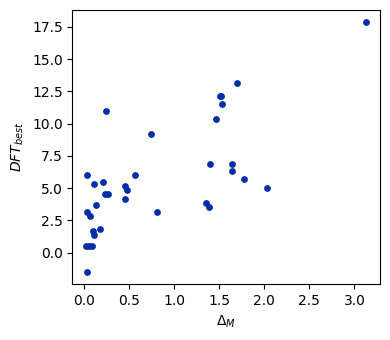

MNIST AlexNet k=4
delta distance: [0.8170508194567129, 0.31188556768339554, 0.09866903132306078, 0.06226899301768649, 0.8539967601310421, 0.2804348070175752, 0.18417806766164144, 1.501639441332778, 1.7222004306510497, 1.5550542341758469, 0.6145377504560696, 0.2010109339345796, 0.12253852212110306, 1.4319788159125701, 1.6744972452186666, 1.5405934411313595, 1.8555306349513083, 1.4380345228083502, 2.10228108494823, 3.1737991368893117, 0.9291299769110658, 0.24672875018955887, 0.14641903252587987, 1.5095407862928198, 1.7254215521105152, 1.5353563254071467, 1.9562752235297343, 1.7355591193588866, 1.956999776301636, 3.1768562815378343, 1.8503776925806787, 1.4290991000284343, 2.0425710060879423, 3.166334036413136, 3.0955735185570625]
delta fault number: [11.75, 5.125, 0.0, 2.125, 2.375, 6.208333333333333, 4.833333333333333, 7.041666666666667, 10.416666666666666, 12.791666666666666, 5.416666666666667, 1.2083333333333333, 2.0416666666666665, 4.625, 8.666666666666666, 13.125, 4.958333333333333, 

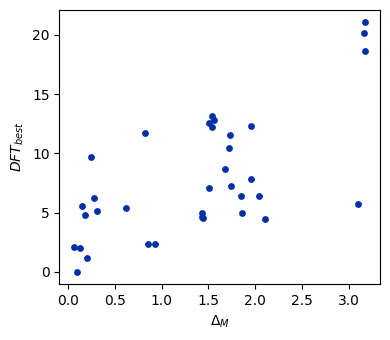

MNIST AlexNet k=5
delta distance: [0.9656493269899998, 0.3140210683848377, 0.21467564025318872, 1.5431108011157464, 1.7564337678850528, 1.5665575028850531, 2.0212926787796675, 1.8035439202842583, 2.024919234880468, 3.216840647081463, 1.9298706114101238, 1.510801967768751, 2.118589459032584, 3.210791075180369, 3.17345774967111, 2.0266032944563093, 1.80527219863203, 1.9803457354645106, 3.20833941774725, 3.353868301688829, 3.1446957569189786]
delta fault number: [3.2083333333333335, 11.125, 7.575, 9.733333333333333, 10.225, 14.433333333333334, 7.225, 7.866666666666666, 10.65, 20.166666666666668, 6.075, 3.95, 4.941666666666666, 19.108333333333334, 5.191666666666666, 4.25, 5.7, 14.983333333333333, 23.141666666666666, 11.683333333333334, 5.941666666666666]
21 0.3207792207792208 0.15625650175659503


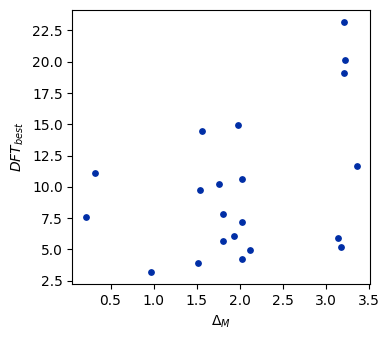

Caltech256 DenseNet121
Caltech256 DenseNet121 k=2
delta distance: [0.34218354917982363, 0.03440315133019702, 0.29257449992573054, 0.8587789565826195, 0.8628018192024411, 0.32667628394081405, 0.07426362033666874, 0.48744476857731756, 0.43536375575704694, 0.3870926277285423, 0.36995175606925595, 0.07678419957530729, 0.1130421807181987, 0.04611422203064977, 0.04555218026032248, 0.4151631182401019, 0.3464085964649692, 0.34548106941959505, 0.7163335403116534, 0.3313102954606124, 0.35510844379244816]
delta fault number: [93.0, 8.0, 48.5, 154.5, 153.0, -10.5, 33.0, 121.5, 65.5, 71.0, 66.0, 21.5, 31.5, 27.0, 19.0, 41.0, 46.5, 79.5, 176.5, 16.0, 47.0]
21 0.8077922077922077 9.502614930342749e-06


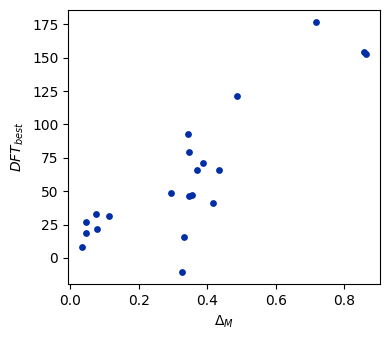

Caltech256 DenseNet121 k=3
delta distance: [0.3895556774843521, 0.7126476108722796, 1.2599702365343497, 1.2067704982410572, 0.6685404835830103, 0.33975528350981654, 0.9367483057691018, 0.9012816488518899, 0.36413234353493884, 1.2201035447685622, 1.163551363359346, 0.6255002001733103, 1.6980630773590513, 1.1888348051669044, 1.1799767423280378, 0.5599157909600937, 0.5381544824723298, 0.4450203671704174, 0.43351170029416136, 0.8945403531393324, 0.8033335154727435, 0.8109476839324157, 1.1424025198213288, 0.7464177631207649, 0.7284364445149398, 0.5189748632601017, 0.40458639890773346, 0.40933191144562464, 0.8049605461597104, 0.42983926846468795, 0.40168381349139914, 1.1131406169306424, 0.7299690212156665, 0.6947763421109568, 1.05494541891806]
delta fault number: [116.83333333333333, 147.33333333333334, 208.0, 220.0, 81.5, 68.33333333333333, 188.66666666666666, 165.16666666666666, -1.0, 191.0, 198.0, 40.0, 269.8333333333333, 178.33333333333334, 151.33333333333334, 150.0, 95.33333333333333, 1

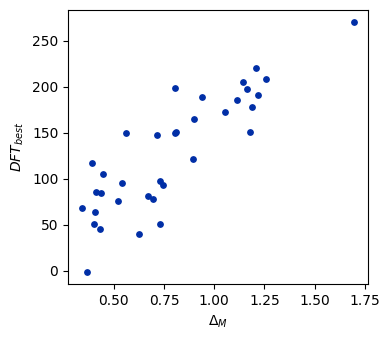

Caltech256 DenseNet121 k=4
delta distance: [0.7670244614659708, 1.3390358622139944, 1.253403442048837, 0.7164871311033263, 1.6664243447102969, 1.5614380726078998, 1.0341498633021302, 2.087233970675394, 1.582537938739776, 1.5249657482582213, 1.29988339022378, 1.2099822136239524, 0.6733835757259033, 1.766479051500627, 1.2632425178597335, 1.2201816417681721, 2.0491759117023745, 1.547464839421228, 1.4852899259886723, 2.0215600471946455, 0.9909365288479183, 0.8663317109084422, 0.8788648636799278, 1.229480423187393, 0.8412511531832747, 0.784935339456918, 1.5779863037854565, 1.1917786974872453, 1.1314318171094528, 1.468329622441779, 1.2011285769183897, 0.8253693771731628, 0.7514296986984558, 1.1379844704794004, 1.4431329619366204]
delta fault number: [181.58333333333334, 227.0, 231.95833333333334, 98.04166666666667, 246.20833333333334, 260.2083333333333, 143.375, 301.625, 217.91666666666666, 221.16666666666666, 213.04166666666666, 213.75, 59.083333333333336, 286.3333333333333, 201.04166666666

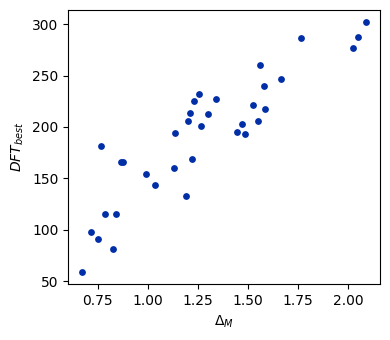

Caltech256 DenseNet121 k=5
delta distance: [1.7459127923540858, 1.6134043534817442, 1.0883913687637115, 2.158015749852186, 1.6587131063282952, 1.5722405443559684, 2.475370044569934, 1.9830220032579482, 1.8785503260699612, 2.4070757825413147, 2.1202604917841623, 1.6241547021908174, 1.532459150766036, 2.0885138025086043, 2.372179184439109, 1.6637111086688416, 1.2832062921628677, 1.1929599853633508, 1.5513815881332504, 1.8941733208205538, 1.526737697733249]
delta fault number: [265.825, 287.19166666666666, 169.84166666666667, 314.19166666666666, 239.125, 242.625, 320.7416666666667, 247.9, 270.96666666666664, 306.175, 305.19166666666666, 215.26666666666668, 210.35, 291.98333333333335, 289.23333333333335, 263.14166666666665, 152.825, 177.61666666666667, 221.93333333333334, 247.225, 213.61666666666667]
21 0.9181818181818181 4.463472446313269e-09


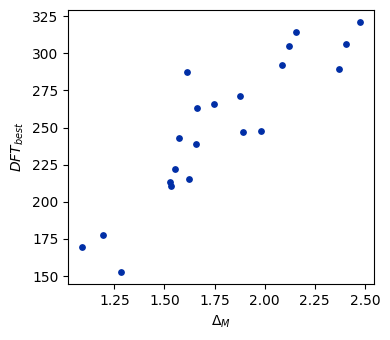

VOC MSRN
VOC MSRN k=2
delta distance: [0.4115469949182584, 0.0888121585805962, 0.41502053194706984, 0.8120350647897618, 0.8931793079674425, 0.3183059172663792, 0.1435456258848141, 0.5828591187463866, 0.5567378094291846, 0.4690314851961706, 0.41946252116285737, 0.13387052192907742, 0.16573484141978895, 0.10763329084436445, 0.07398679642171228, 0.5078004570459539, 0.4524909919212505, 0.396351796005634, 0.9111171499343322, 0.26382869209796067, 0.316204227553784]
delta fault number: [13.0, 16.0, 25.5, 54.5, 52.5, 6.0, 12.5, 46.0, 22.0, 19.0, 8.0, -1.5, 16.5, 1.0, -1.5, 43.5, 19.0, 29.0, 46.5, 21.5, 22.0]
21 0.797530440805781 1.4919868128010888e-05


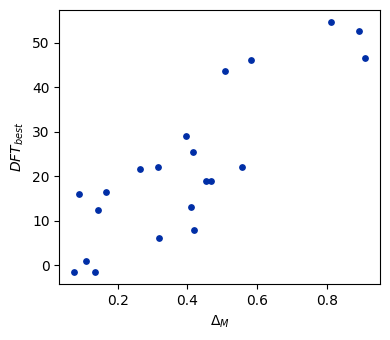

VOC MSRN k=3
delta distance: [0.5279294117465199, 0.9010680538912114, 1.3262945824312329, 1.3273623754233552, 0.7235339306936751, 0.5243650954526595, 0.9547427412951252, 0.9948565809844906, 0.40652953512425166, 1.3007376073873622, 1.325408039202937, 0.722387805999614, 1.7190570047068388, 1.1033930676823842, 1.198179343856448, 0.7219614021871427, 0.7181846253238607, 0.5977178553647847, 0.5451713776282529, 1.0843260269873074, 0.9787000478851583, 0.9304775889121605, 1.4466709447339012, 0.8061917344862618, 0.7691766699191303, 0.6679998795336001, 0.5758178433735957, 0.5136488783034948, 1.0609182670402344, 0.4195945910794239, 0.41919756430467386, 1.4102894497897687, 0.758965047086383, 0.7509591998088929, 1.1860913050719093]
delta fault number: [19.5, 32.333333333333336, 68.83333333333333, 53.0, 8.5, 23.0, 59.0, 56.5, 11.333333333333334, 76.83333333333333, 65.16666666666667, 31.333333333333332, 87.5, 47.833333333333336, 53.166666666666664, 51.166666666666664, 35.166666666666664, 14.3333333333

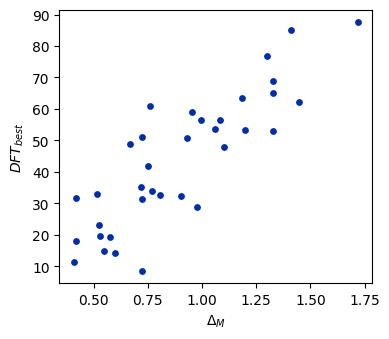

VOC MSRN k=4
delta distance: [1.0249213543748459, 1.4733784827907745, 1.4444042060905862, 0.8357977031975944, 1.8405264603727922, 1.8063776518966623, 1.1963378225675319, 2.2217629586985077, 1.607134586581881, 1.6281005197754208, 1.4451798716743298, 1.4382242490231665, 0.8288723681837918, 1.8549437619117948, 1.2406566709148537, 1.2985366228713229, 2.200130005668508, 1.5808665223909948, 1.6233208565396586, 2.0068657533224563, 1.241355389115187, 1.1115851747949106, 1.0623849050909726, 1.5983830192178081, 0.9620831681837559, 0.8920295170071175, 1.9659130474016946, 1.325453014925877, 1.2609321012974564, 1.7114213104530116, 1.5601128769138086, 0.9134392255281752, 0.8692154582932862, 1.3303546431936253, 1.6752418615608944]
delta fault number: [37.875, 71.79166666666667, 62.5, 12.875, 79.375, 80.08333333333333, 42.5, 94.41666666666667, 65.29166666666667, 62.333333333333336, 83.33333333333333, 71.83333333333333, 38.083333333333336, 94.54166666666667, 57.125, 57.0, 105.83333333333333, 75.9166666

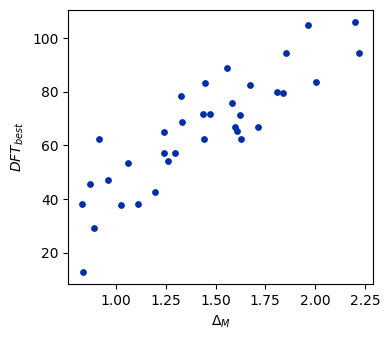

VOC MSRN k=5
delta distance: [1.9872270619093608, 1.9291846546904678, 1.316733614353368, 2.362449604994666, 1.749843690620093, 1.7426745651412143, 2.7253099875321025, 2.111304790214645, 2.09755069013235, 2.5030800917513605, 2.338593992358258, 1.7211264493588352, 1.7341596899566052, 2.1394534722491447, 2.4806374126573183, 2.116377307286329, 1.4789451046990107, 1.3895478957503868, 1.8589642659908614, 2.2224699831915427, 1.8209697152367184]
delta fault number: [86.25833333333334, 86.15833333333333, 44.74166666666667, 100.15, 71.43333333333334, 64.94166666666666, 111.99166666666666, 85.36666666666666, 81.86666666666666, 93.35833333333333, 110.25, 83.55, 77.575, 90.4, 105.04166666666667, 114.65, 83.74166666666666, 57.425, 74.61666666666666, 101.225, 89.45833333333333]
21 0.8480519480519481 1.203804085854572e-06


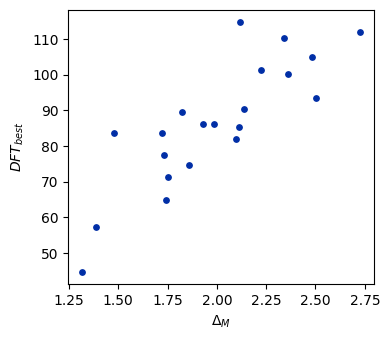

COCO MLD
COCO MLD k=2
delta distance: [0.41869159353550256, 0.05901959861651921, 0.39336806408400776, 0.4920252835966823, 0.8642322945340135, 0.294270481301811, 0.10354108694468006, 0.5747665633672561, 0.5480998699469746, 0.465892860440883, 0.4206524944629789, 0.09381716492528885, 0.12662511166858936, 0.07272602288135613, 0.050658089840510415, 0.48116569985674496, 0.43403189271180365, 0.3713839158445409, 0.5645524311793186, 0.24959887892313304, 0.2821723156190087]
delta fault number: [296.0, 60.0, 387.0, 1197.5, 2497.0, 142.5, 479.5, 2757.5, 903.0, 273.0, 946.0, 292.5, 693.5, 40.0, -2.5, 1032.0, 537.0, 1216.5, 1211.0, 1386.0, 343.0]
21 0.6935064935064935 0.00048989740104046


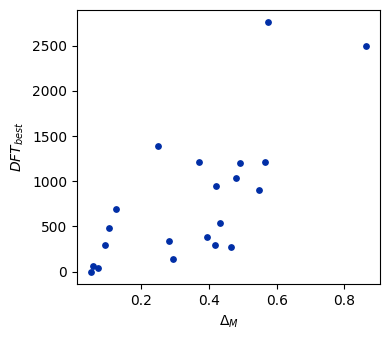

COCO MLD k=3
delta distance: [0.49941085972296667, 0.8833338895067097, 0.9926528054881493, 1.300820253626269, 0.7020276873857606, 0.46807455671061987, 0.5911074836567122, 0.9323087562145721, 0.3530382370726323, 0.943531588951811, 1.2750122447056775, 0.6698805787661349, 1.3670900277621005, 0.7651842906263505, 1.1406844898997681, 0.6739206512170219, 0.6682814947242012, 0.5556421649565565, 0.5110806681011569, 1.0529058482035283, 0.954124161220176, 0.9052320044652573, 1.0863176634579592, 0.775442517498778, 0.732115403157311, 0.5995296390807123, 0.5184342987755293, 0.4540614609654376, 0.6707271698244378, 0.36354993375716244, 0.3522255317958858, 1.034315345372396, 0.7038723194181795, 0.6936444869565234, 0.8169133246538234]
delta fault number: [395.6666666666667, 808.3333333333334, 1431.1666666666667, 2686.0, 454.5, 455.0, 1336.3333333333333, 2566.6666666666665, 211.83333333333334, 1438.1666666666667, 2817.5, 542.5, 3151.3333333333335, 1175.6666666666667, 2521.0, 2967.3333333333335, 1502.8333

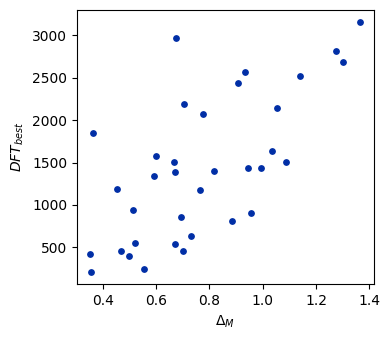

COCO MLD k=4
delta distance: [0.9695709659707165, 1.0966109296098179, 1.3811141624255319, 0.7797153994854221, 1.4761465228336128, 1.7564015772297974, 1.1462569292481195, 1.857258463519247, 1.251844849813745, 1.571206954436984, 1.0447999657741065, 1.3514974745242636, 0.7425765942702842, 1.459964483271403, 0.8593376959968589, 1.2080490658720857, 1.8146852648498397, 1.199280517914199, 1.5405133948069663, 1.6312682219795998, 1.167659735852359, 1.0467580379235044, 0.9993585109941453, 1.1948099911234247, 0.8897348760866253, 0.8180274753797021, 1.5805932683509158, 1.2644940956969648, 1.1998981478998074, 1.3267568981891427, 1.1405196638331667, 0.8164489503616168, 0.7750333914103825, 0.9181206085768179, 1.270743805084097]
delta fault number: [897.1666666666666, 1595.2916666666667, 2744.0833333333335, 541.4583333333334, 1885.4583333333333, 3066.875, 1012.5, 3400.75, 1470.6666666666667, 2712.6666666666665, 1607.9166666666667, 2856.9583333333335, 612.5416666666666, 3244.6666666666665, 1332.25, 256

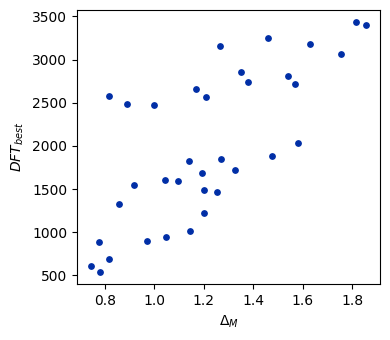

COCO MLD k=5
delta distance: [1.5799042584072787, 1.8409642434193443, 1.2299979034113793, 1.9550025611366484, 1.3519138148249132, 1.6498611281838587, 2.3309799352396543, 1.7207330489881905, 2.0146540771621875, 2.113677356160255, 1.9101783501974756, 1.296891876161515, 1.6157923861915369, 1.7215768772153117, 2.067954064603958, 1.6877569487874544, 1.3759423643364512, 1.2898394970348304, 1.4316302229061653, 1.8083760597378535, 1.3735353988861576]
delta fault number: [2020.9916666666666, 3108.383333333333, 1048.1416666666667, 3477.1, 1629.0, 2756.775, 3719.7833333333333, 1874.8916666666667, 3098.758333333333, 3414.075, 3508.141666666667, 1642.2916666666667, 2862.175, 3274.758333333333, 3450.55, 2190.766666666667, 3490.475, 1296.2833333333333, 1856.6916666666666, 2257.483333333333, 2013.9916666666666]
21 0.7974025974025974 1.5001549621912602e-05


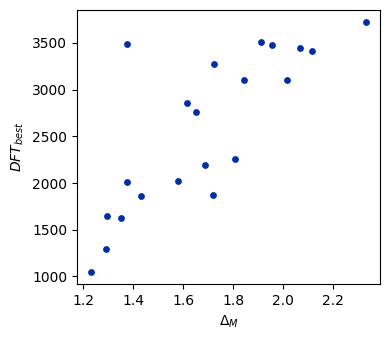

In [93]:
# check delta Effectiveness w.r.t. Fault, 2-5way
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

for dataset in datasets:
	# if dataset!='VOC':
	# 	continue
	filename = f'results/SelfOracle/{dataset}_validity.npy'
	validity_followup = get_validity(dataset) 
	if dataset == 'MNIST':
		extractor = 'lenet5'
	else:
		extractor = 'vgg16'
	save_path = os.path.join('results', extractor, f'{dataset}.pt')
	source__features = torch.load(save_path)
	followup__features_followup = []
	for i in range(len(mrs)):
		save_path = os.path.join('results', extractor, f'{dataset}_{i}.pt')
		followup__features_followup.append(torch.load(save_path))
	all_features = [source__features] + followup__features_followup
	all_features = [f.cpu().numpy() for f in all_features]
	all_features = np.concatenate(all_features, axis=0)
	pca = PCA(n_components=8)
	reduced_features = pca.fit_transform(all_features)
	source_length = len(source__features)
	source_features = reduced_features[:source_length]
	followup_features = reduced_features[source_length:]
	followup_separated = [followup_features[i * source_length:(i + 1) * source_length] for i in range(7)]

	for model in models[dataset]:
		print(dataset, model)
		model_name = get_model_name(dataset, model)
		with open(f'error_revealing/fault_{model_name}.pkl', 'rb') as f:
			fault_all = pickle.load(f)
		for i in range(2, strength_max+1):
			deltadis, deltaeff = [], []
			for com in combinations(range(len(mrs)), i):
				select_com = com[0]
				for j in range(1, len(com)):
					if (len(set(fault_all[(com[j],)].values())) > len(set(fault_all[(select_com,)].values()))):
						select_com = com[j]

				delta_d = []
				delta_e = []
				for cmr in permutations(com):
					d, f, f_c, v_p_num = 0, set(), set(), 0
					for index in range(source_length):
						if validity_followup[cmr][index] and validity_followup[(select_com,)][index]:
							v_p_num += 1

							delta_com = []
							for c in cmr:
								delta_com.append(followup_separated[c][index] - source_features[index])
							combined = sum(delta_com)
							delta = followup_separated[select_com][index] - source_features[index]
							d += np.linalg.norm(combined) - np.linalg.norm(delta)
       
							#print(cmr, d, index)
							if index in errors[model_name][(select_com,)]:
								f_c.add(fault_all[(select_com,)][index])
							if index in errors[model_name][cmr]:
								f.add(fault_all[cmr][index])
					delta_d.append(d / v_p_num)
					delta_e.append((len(f) - len(f_c)))
				#print(com, select_com, delta_d, delta_e)
				deltadis.append(sum(delta_d) / len(delta_d))
				deltaeff.append(sum(delta_e) / len(delta_e))
			correlation, p_value = spearmanr(deltadis, deltaeff)
			print(dataset, model, f'k={i}')
			print('delta distance:', deltadis)
			print('delta fault number:', deltaeff)
			print(len(deltadis), correlation, p_value)
			plt.figure(figsize=(4, 3.5))
			plt.scatter(deltadis, deltaeff,  color="#002EA6", s=15)
			plt.xlabel(r"$\Delta_M$")
			plt.ylabel(r"$\mathit{DFT}_{\mathit{best}}$")
			#plt.title("Scatter Plot")
			plt.tight_layout()
			plt.savefig(f"results/RQ3.2/fault_{dataset}_{model}_{i}_scatter_plot.pdf", dpi=300, bbox_inches='tight')
			plt.show()

# RQ3.3 Sequence

In [ ]:
def sequence_effect_failure_ratio(dataset, model):
    model_name = get_model_name(dataset, model)
    validity_followup = get_validity(dataset)
    source_num = len(validity_followup[(0,)])
    dim = strength_max - 1
    error_way_union = [{} for _ in range(dim)]  
    for i in range(dim):
        for com in combinations(range(len(mrs)), i+2):
            error_way_union[i][com] = []
    for i in range(dim):
        for per in permutations(range(len(mrs)), i+2):
            com = tuple(sorted(per))
            error = errors[model_name][per]
            error_way_union[i][com].append(len(error) / source_num)
    result = []
    for i in range(dim):
        mean, sd, cov = 0, 0, 0
        for com in error_way_union[i]:
            mean += np.mean(error_way_union[i][com])
            sd += np.std(error_way_union[i][com])
            cov += np.std(error_way_union[i][com]) / np.mean(error_way_union[i][com])
        mean /= len(error_way_union[i])
        sd /= len(error_way_union[i])
        cov /= len(error_way_union[i]) 
        result.append([str(custom_round(mean*100, 2))+'%', str(custom_round(sd*100, 2))+'%', str(custom_round(cov*100, 2))+'%'])
    return result

def sequence_effect_fault_number(dataset, model):
    model_name = get_model_name(dataset, model)
    with open(f'error_revealing/fault_{model_name}.pkl', 'rb') as f:
        fault_all = pickle.load(f)
    dim = strength_max - 1
    error_way_union = [{} for _ in range(dim)]  
    for i in range(dim):
        for com in combinations(range(len(mrs)), i+2):
            error_way_union[i][com] = []
    for i in range(dim):
        for per in permutations(range(len(mrs)), i+2):
            com = tuple(sorted(per))
            fault = set(fault_all[per].values())
            error_way_union[i][com].append(len(fault))
    result = []
    for i in range(dim):
        mean, sd, cov = 0, 0, 0
        for com in error_way_union[i]:
            mean += np.mean(error_way_union[i][com])
            sd += np.std(error_way_union[i][com])
            cov += np.std(error_way_union[i][com]) / np.mean(error_way_union[i][com])
        mean /= len(error_way_union[i])
        sd /= len(error_way_union[i])
        cov /= len(error_way_union[i])
        result.append([custom_round(mean,1), custom_round(sd,1), str(custom_round(cov*100, 2))+'%'])
    return result

def compare_sequence():
    geometry_options = {"tmargin": "0.5in", "lmargin": "0.1in", "bmargin": "0.5in", "rmargin": "0in"}
    doc = Document("results/RQ3.3/RQ3.3_table", geometry_options=geometry_options)
    section = Section('RQ3.3')
    subsection1 = Subsection('Failure Ratio - Composition Sequences Mean, Standard Deviation, Relative Standard Deviation')
    table1 = Tabular('|c|c|c|c|c|c|')
    table1.add_hline()
    table1.add_row('Dataset', 'Model', 'K', 'Mean', 'SD', 'RSD')
    table1.add_hline()
    for dataset in datasets:
        row_num = strength_max - 1
        for index, model in enumerate(models[dataset]):
            results = sequence_effect_failure_ratio(dataset, model)
            if index==0:
                    table1.add_row(MultiRow(len(models[dataset])*row_num, data=dataset),
                                MultiRow(row_num, data=model), 2, *results[0])
            else:
                table1.add_row('', MultiRow(row_num, data=model), 2, *results[0])
            table1.add_hline(3)
            for i in range(row_num-1):
                table1.add_row('', '', i + 3, *results[i + 1])
                table1.add_hline(3)
            table1.add_hline(2,2)
        table1.add_hline(1,1)
    subsection1.append(table1)

    subsection2 = Subsection('Fault Number - Composition Sequences Mean, Standard Deviation, Relative Standard Deviation')
    table2 = Tabular('|c|c|c|c|c|c|')
    table2.add_hline()
    table2.add_row('Dataset', 'Model', 'K', 'Mean', 'SD', 'RSD')
    table2.add_hline()
    for dataset in datasets:
        row_num = strength_max - 1
        for index, model in enumerate(models[dataset]):
            results = sequence_effect_fault_number(dataset, model)
            if index==0:
                    table2.add_row(MultiRow(len(models[dataset])*row_num, data=dataset),
                                MultiRow(row_num, data=model), 2, *results[0])
            else:
                table2.add_row('', MultiRow(row_num, data=model), 2, *results[0])
            table2.add_hline(3)
            for i in range(row_num-1):
                table2.add_row('', '', i + 3, *results[i + 1])
                table2.add_hline(3)
            table2.add_hline(2,2)
        table2.add_hline(1,1)

    subsection2.append(table2)
    section.append(subsection1)
    section.append(subsection2)
    doc.append(section)
    doc.generate_pdf(clean_tex=False)

In [64]:
def sequence_effect(dataset, model):
	model_name = get_model_name(dataset, model)
	print(model_name)
	validity_followup = get_validity(dataset)
	with open(f'error_revealing/fault_{model_name}.pkl', 'rb') as f:
		fault_all = pickle.load(f)
	source_num = len(validity_followup[(0,)])
	for k in range(1, strength_max):
		k = k + 1
		dfr_max_mean, dfr_max_std, dfr_mean_mean, dfr_mean_std = [], [], [], []
		dft_max_mean, dft_max_std, dft_mean_mean, dft_mean_std = [], [], [], []
		for com in combinations(range(len(mrs)), k):
			dfr_max_com, dfr_mean_com, dft_max_com, dft_mean_com = [], [], [], []
			fr_max, fr_mean = 0, 0
			ft_max, ft_mean = 0, 0
			for mr in com:
				fr_mean += len(errors[model_name][(mr,)]) / source_num
				if len(errors[model_name][(mr,)]) / source_num > fr_max:
					fr_max = len(errors[model_name][(mr,)]) / source_num
				ft_mean += len(set(fault_all[(mr,)].values()))
				if len(set(fault_all[(mr,)].values())) > ft_max:
					ft_max = len(set(fault_all[(mr,)].values()))
			fr_mean, ft_mean = fr_mean / len(com), ft_mean / len(com)
			for per in permutations(com):
				error = errors[model_name][per]
				fr = len(error) / source_num
				ft = len(set(fault_all[per].values()))
				dfr_max_com.append(fr - fr_max)
				dfr_mean_com.append(fr - fr_mean)
				dft_max_com.append(ft - ft_max)
				dft_mean_com.append(ft - ft_mean)
			
			# dfr_max_cv.append(np.std(dfr_max_com)/np.mean(dfr_max_com))
			# dfr_mean_cv.append(np.std(dfr_mean_com)/np.mean(dfr_mean_com))
			# dft_max_cv.append(np.std(dft_max_com)/np.mean(dft_max_com))
			# dft_mean_cv.append(np.std(dft_mean_com)/np.mean(dft_mean_com))

			dfr_max_mean.append(np.mean(dfr_max_com))
			dfr_max_std.append(np.std(dfr_max_com))
			dfr_mean_mean.append(np.mean(dfr_mean_com))
			dfr_mean_std.append(np.std(dfr_mean_com))
			dft_max_mean.append(np.mean(dft_max_com))
			dft_max_std.append(np.std(dft_max_com))
			dft_mean_mean.append(np.mean(dft_mean_com))
			dft_mean_std.append(np.std(dft_mean_com))

		#print(len(dfr_max_cv), dfr_max_cv)
		dfr_max_mean, dfr_max_std, dfr_mean_mean, dfr_mean_std = np.mean(dfr_max_mean), np.mean(dfr_max_std), np.mean(dfr_mean_mean), np.mean(dfr_mean_std)
		dft_max_mean, dft_max_std, dft_mean_mean, dft_mean_std = np.mean(dft_max_mean), np.mean(dft_max_std), np.mean(dft_mean_mean), np.mean(dft_mean_std)
		print(f"& {k} & {dfr_max_mean*100:.2f}\\% & {dfr_max_std*100:.2f}\\% & {dfr_mean_mean*100:.2f}\\% & {dfr_mean_std*100:.2f}\\% & "
			f"{dft_max_mean:.2f} & {dft_max_std:.2f} & {dft_mean_mean:.2f} & {dft_mean_std:.2f} \\\\"
		)

def compare_sequence():
	for dataset in datasets:
		for _, model in enumerate(models[dataset]):
			sequence_effect(dataset, model)

In [ ]:
compare_sequence()

MNIST_AlexNet_9938
& 2 & 0.12\% & 0.01\% & 0.32\% & 0.01\% & -1.21 & 0.45 & 6.74 & 0.45 \\
& 3 & 0.33\% & 0.04\% & 0.65\% & 0.04\% & -3.96 & 0.97 & 8.38 & 0.97 \\
& 4 & 0.67\% & 0.09\% & 1.07\% & 0.09\% & -6.18 & 1.58 & 8.62 & 1.58 \\
& 5 & 1.15\% & 0.20\% & 1.60\% & 0.20\% & -7.81 & 2.29 & 8.38 & 2.29 \\
Caltech256_DenseNet121_6838
& 2 & 2.35\% & 0.11\% & 5.82\% & 0.11\% & 62.33 & 3.81 & 152.19 & 3.81 \\
& 3 & 5.14\% & 0.19\% & 10.46\% & 0.19\% & 128.11 & 6.16 & 262.48 & 6.16 \\
& 4 & 8.22\% & 0.31\% & 14.70\% & 0.31\% & 190.84 & 10.30 & 351.24 & 10.30 \\
& 5 & 11.51\% & 0.41\% & 18.74\% & 0.41\% & 250.14 & 13.80 & 425.67 & 13.80 \\
VOC_MSRN
& 2 & 1.38\% & 0.09\% & 3.92\% & 0.09\% & 22.43 & 2.38 & 79.00 & 2.38 \\
& 3 & 2.90\% & 0.22\% & 6.71\% & 0.22\% & 43.71 & 3.30 & 124.20 & 3.30 \\
& 4 & 4.54\% & 0.35\% & 9.07\% & 0.35\% & 65.72 & 5.34 & 159.12 & 5.34 \\
& 5 & 6.26\% & 0.44\% & 11.22\% & 0.44\% & 86.39 & 7.06 & 187.39 & 7.06 \\
COCO_MLD
& 2 & 2.30\% & 0.10\% & 10.86\% & 0.10\% & 7